# **Project Name**    - Amazon Prime EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual : Ankita Dutta

# **Project Summary -**

### **Amazon Prime Exploratory Data Analysis (EDA) – Summary**  

This notebook performs an extensive **Exploratory Data Analysis (EDA)** on Amazon Prime content data. The goal is to uncover meaningful insights into the platform's content library by analyzing trends, genres, ratings, languages, and contributors. The analysis follows a structured approach, ensuring that the dataset is properly loaded, cleaned, and visualized to extract key observations.  

The project begins by importing essential Python libraries such as **Pandas** for data manipulation, **NumPy** for numerical computations, and **Matplotlib and Seaborn** for data visualization. These tools are fundamental for handling large datasets efficiently and creating insightful graphs. The dataset used in this analysis is sourced from **GitHub raw CSV links** and consists of two files:  
1. **`titles.csv`** – Contains details about movies and TV shows, including their title, release year, genre, IMDb rating, duration, and language.  
2. **`credits.csv`** – Provides information about the cast and crew, linking actors and directors to their respective works.  

Once the datasets are loaded using `pd.read_csv()`, the analysis begins with an **initial exploration** to understand the dataset’s structure. This includes displaying the first and last few rows using `head()` and `tail()`, checking the number of rows and columns with `shape`, and using `info()` to examine data types and missing values. To ensure data quality, the code also identifies duplicate records by applying `duplicated().sum()` and removes them using `drop_duplicates()`.  

Next, **data cleaning** is performed to handle inconsistencies and missing values. The presence of `NaN` values is checked using `isnull().sum()`, and appropriate measures like `fillna()` or `dropna()` are taken to prevent inaccuracies in analysis. Ensuring data integrity at this stage is crucial for meaningful visualization and interpretation.  

The **Exploratory Data Analysis (EDA)** section employs various visualizations to uncover content trends on Amazon Prime. One of the key analyses is **content distribution over time**, where the number of movies and TV shows added to the platform is examined by grouping the data by release year. This trend is visualized using `plt.plot()` and `sns.lineplot()`, helping to identify spikes or declines in content additions over the years.  

Another important aspect explored is **genre distribution**. Since movies and TV shows belong to multiple genres, the data is processed to extract unique genres and count their occurrences. This is visualized using a **bar plot (`sns.barplot()`)**, highlighting the most common genres available on Amazon Prime.  

The analysis also examines **IMDb ratings**, which indicate the quality and popularity of content. A **histogram (`histplot()`)** is used to show the distribution of IMDb scores, helping to determine whether most content falls in the high-rating or low-rating category. The dataset is further categorized based on rating ranges to identify trends in viewer preferences.  

Another crucial aspect is **language distribution**, where the dominance of different languages in Amazon Prime’s catalog is analyzed. A **pie chart (`sns.pieplot()`)** is used to represent the share of various languages, helping to determine whether the platform offers a diverse selection or is skewed toward specific languages.  

Additionally, the analysis identifies **top actors and directors** who have contributed the most to Amazon Prime’s content. Using `value_counts()`, the dataset is processed to extract the most frequently occurring actors and directors. This information is then visualized with a **bar chart (`sns.barplot()`)**, showcasing the most influential contributors in Amazon Prime’s library.  

To explore relationships between features, the notebook includes **correlation analysis** using a **heatmap (`sns.heatmap()`)**, which helps identify patterns between numerical variables such as IMDb rating and movie duration. A **pairplot (`sns.pairplot()`)** is also generated to further analyze feature relationships, while **box plots** provide a visual representation of distributions based on categorical factors such as genre or language.  

Overall, this **structured EDA approach** enables a comprehensive understanding of Amazon Prime’s content catalog, providing valuable insights into genre preferences, language diversity, rating trends, and contributor impact. The findings can help streaming platforms and content creators make data-driven decisions regarding content acquisition and production.

# **GitHub Link -**

https://github.com/ankitaXdutta/Amazon-EDA

# **Problem Statement**


 **Problem Statement**  

This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:  

- **Content Diversity**: What genres and categories dominate the platform?  
- **Regional Availability**: How does content distribution vary across different regions?  
- **Trends Over Time**: How has Amazon Prime's content library evolved?  
- **IMDb Ratings & Popularity**: What are the highest-rated or most popular shows on the platform?  

By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [235]:
# Import Libraries

# Pandas is used for data manipulation and analysis
import pandas as pd

# NumPy is used for numerical computations and efficient array operations
import numpy as np

# Matplotlib is used for creating static visualizations
import matplotlib.pyplot as plt

# Seaborn is useful for statistical data visualization with enhanced aesthetics
import seaborn as sns

### Dataset Loading

In [236]:
# Load Dataset
# Load datasets from raw GitHub links
credits_url = "https://raw.githubusercontent.com/ankitaXdutta/Amazon-EDA/refs/heads/main/credits.csv"
titles_url = "https://raw.githubusercontent.com/ankitaXdutta/Amazon-EDA/refs/heads/main/titles.csv"

# Read the datasets into Pandas DataFrames
credits_df = pd.read_csv(credits_url)
titles_df = pd.read_csv(titles_url)

### Dataset First View

In [237]:
# Dataset First Look
# Display the first few rows of each dataset to get an initial overview
print("First few rows of titles dataset:")
print(titles_df.head())
print("\nFirst few rows of credits dataset:")
print(credits_df.head())

# Display the last few rows of each dataset to check for any irregularities at the end
print("\nLast few rows of titles dataset:")
print(titles_df.tail())
print("\nLast few rows of credits dataset:")
print(credits_df.tail())

First few rows of titles dataset:
        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genre

### Dataset Rows & Columns count

In [238]:
# Dataset Rows & Columns count
print("\nNumber of rows and columns in titles dataset:", titles_df.shape)
print("Number of rows and columns in credits dataset:", credits_df.shape)


Number of rows and columns in titles dataset: (9871, 15)
Number of rows and columns in credits dataset: (124235, 5)


### Dataset Information

In [239]:
# Dataset Info

print("\nDetailed Information about Titles Dataset:")
titles_df.info()
print("\nDetailed Information about Credits Dataset:")
credits_df.info()


Detailed Information about Titles Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 n

#### Duplicate Values

In [240]:
# Dataset Duplicate Value Count

# Checking for duplicate entries in each dataset
print("\nNumber of duplicate rows in titles dataset:", titles_df.duplicated().sum())
print("Number of duplicate rows in credits dataset:", credits_df.duplicated().sum())

# Checking for duplicate IDs in each dataset
print("\nNumber of duplicate IDs in titles dataset:", titles_df['id'].duplicated().sum())
print("Number of duplicate IDs in credits dataset:", credits_df['id'].duplicated().sum())



Number of duplicate rows in titles dataset: 3
Number of duplicate rows in credits dataset: 56

Number of duplicate IDs in titles dataset: 3
Number of duplicate IDs in credits dataset: 115374


#### Missing Values/Null Values

In [241]:
# Missing Values/Null Values Count
# Checking for missing values in both datasets
print("\nMissing values in titles dataset:")
print(titles_df.isnull().sum())
print("\nMissing values in credits dataset:")
print(credits_df.isnull().sum())



Missing values in titles dataset:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

Missing values in credits dataset:
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


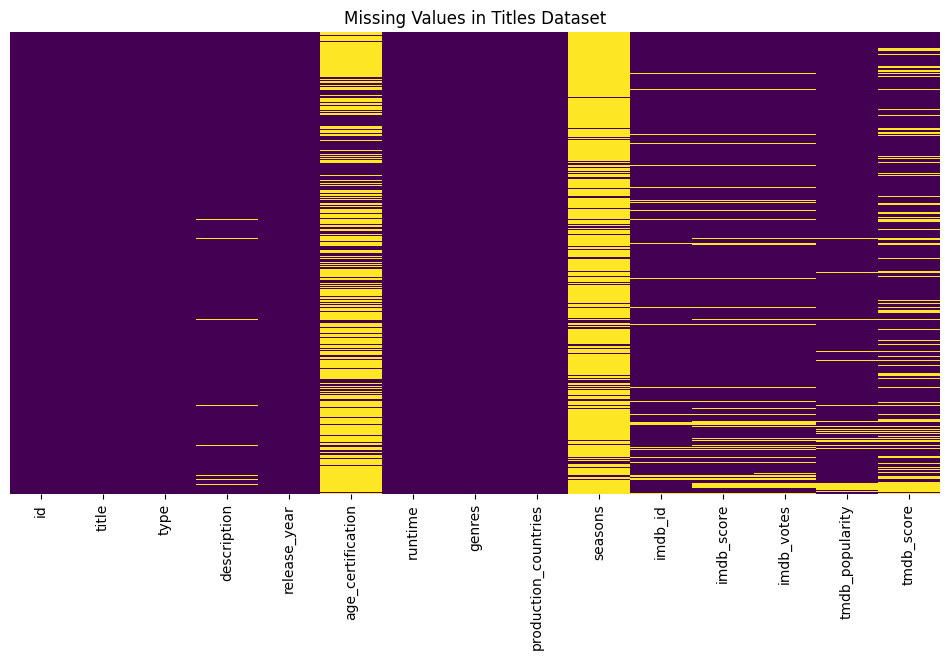

In [242]:
# Visualizing the missing values in titles with heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(titles_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values in Titles Dataset")
plt.show()


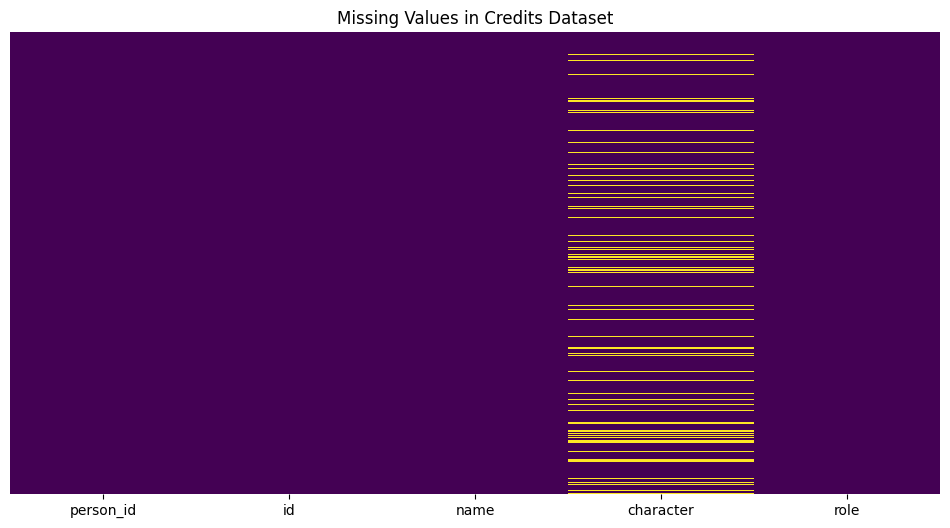

In [243]:
# Visualizing the missing values in credits with heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(credits_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values in Credits Dataset")
plt.show()

### Data Dictionary

In [244]:
# Function to create a data dictionary
def generate_data_dictionary(df, dataset_name):
    data_dict = pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Non-Null Count": df.notnull().sum().values,
        "Unique Values": df.nunique().values
    })
    print(f"\nData Dictionary for {dataset_name} Dataset:")
    print(data_dict)

# Generate data dictionary for titles dataset
generate_data_dictionary(titles_df, "Titles")

# Generate data dictionary for credits dataset
generate_data_dictionary(credits_df, "Credits")



Data Dictionary for Titles Dataset:
             Column Name Data Type  Non-Null Count  Unique Values
0                     id    object            9871           9868
1                  title    object            9871           9737
2                   type    object            9871              2
3            description    object            9752           9734
4           release_year     int64            9871            110
5      age_certification    object            3384             11
6                runtime     int64            9871            207
7                 genres    object            9871           2028
8   production_countries    object            9871            497
9                seasons   float64            1357             32
10               imdb_id    object            9204           9201
11            imdb_score   float64            8850             86
12            imdb_votes   float64            8840           3650
13       tmdb_popularity   float64     

### What did you know about your dataset? : Summary of what I found


- The **titles** dataset (9,871 entries, 15 columns) contains information on movies and shows, including title, type, release year, runtime, genres, production countries, and various rating metrics like IMDb and TMDB scores.

- The **credits** dataset (124,235 entries, 5 columns) provides details on cast and crew, including person ID, name, role, character, and the associated title ID.

**Missing :**
- The titles dataset has substantial missing values, notably in age_certification (6,487), seasons (8,514), and rating-related columns (imdb_score, imdb_votes, tmdb_score), which could impact content classification and popularity analysis.

- The credits dataset has 16,287 missing values in the character column, meaning many roles are unnamed, which could affect cast-based insights.

- While some missing values (like character names) may not be critical, others (like ratings and seasons) could affect analytical insights, requiring imputation or careful handling.

**Duplicate :**

- The titles dataset has 3 duplicate rows and 3 duplicate IDs, indicating minor redundancy.

- The credits dataset, however, has 56 duplicate rows and a staggering 115,374 duplicate IDs, meaning most of the IDs in this dataset are repeated multiple times.

- Since the id column is meant to be a unique identifier for titles, the high number of duplicate IDs in the credits dataset suggests that multiple people are associated with the same title (which is expected for cast and crew data). However, this also means that before merging, careful handling of duplicates is necessary to avoid excessive data inflation.




## ***2. Understanding Your Variables***

In [245]:
# Dataset Columns
print("# Dataset Columns")
print("Titles Dataset Columns:", titles_df.columns.tolist())
print("Credits Dataset Columns:", credits_df.columns.tolist())

# Dataset Columns
Titles Dataset Columns: ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
Credits Dataset Columns: ['person_id', 'id', 'name', 'character', 'role']


In [246]:
# Dataset Describe (Statistical info)
print("\n# Dataset Describe")
print("Titles Dataset Description:\n", titles_df.describe(include='all'))
print("\nCredits Dataset Description:\n", credits_df.describe(include='all'))


# Dataset Describe
Titles Dataset Description:
              id      title   type         description  release_year  \
count      9871       9871   9871                9752   9871.000000   
unique     9868       9737      2                9734           NaN   
top     tm66674  King Lear  MOVIE  No overview found.           NaN   
freq          2          3   8514                   5           NaN   
mean        NaN        NaN    NaN                 NaN   2001.327221   
std         NaN        NaN    NaN                 NaN     25.810071   
min         NaN        NaN    NaN                 NaN   1912.000000   
25%         NaN        NaN    NaN                 NaN   1995.500000   
50%         NaN        NaN    NaN                 NaN   2014.000000   
75%         NaN        NaN    NaN                 NaN   2018.000000   
max         NaN        NaN    NaN                 NaN   2022.000000   

       age_certification      runtime     genres production_countries  \
count               3384 

### Variables Description

- The Titles dataset includes variables like id, title, type, description, release_year, age_certification, runtime, genres, production_countries, and seasons, which define the content attributes, while imdb_id, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score provide ratings and popularity metrics. The Credits dataset consists of person_id, id, name, character, and role, where person_id and name identify individuals, id links them to titles, character shows their on-screen roles, and role distinguishes actors from crew members.

- The describe() function provides statistical summaries for both datasets, showing count, unique values, top occurrences, frequencies, and distribution metrics like mean, min, max, and quartiles. It highlights key insights such as the average release year, most common genres, and rating distributions in the Titles dataset, while revealing actor frequency and role distribution in the Credits dataset.

- The output shows that the Titles dataset has 9,871 entries, mostly movies, with an average release year of 2001 and IMDb scores ranging from 1.1 to 9.9. The Credits dataset contains 124,235 records, with 88,861 unique titles, and "ACTOR" being the most frequent role, appearing in 115,846 entries.

### Check Unique Values for each variable.

In [247]:
# Check Unique Values for each variable.
# Check Unique Values for each variable
print("\n# Check Unique Values for each variable")
print("Titles Dataset Unique Values:\n", titles_df.nunique())
print("\nCredits Dataset Unique Values:\n", credits_df.nunique())


# Check Unique Values for each variable
Titles Dataset Unique Values:
 id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64

Credits Dataset Unique Values:
 person_id    80508
id            8861
name         79758
character    71097
role             2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [248]:
# Handling missing values in credits

credits_df["character"] = credits_df["character"].fillna("")

In [249]:
# Verify if handled
print("\nMissing values in credits dataset:")
print(credits_df.isnull().sum())


Missing values in credits dataset:
person_id    0
id           0
name         0
character    0
role         0
dtype: int64


In [250]:
# Handling missing values in titles

# 1. Fill missing descriptions (object) with a placeholder
titles_df["description"] = titles_df["description"].fillna("No description available")

# 2. Fill missing age certifications (object) with "Not Rated"
titles_df["age_certification"] = titles_df["age_certification"].fillna("Not Rated")

# 3. Fill missing seasons (float64) with 0.0 (since it represents countable seasons)
titles_df["seasons"] = titles_df["seasons"].fillna(0).astype(int)

# 4. Fill missing IMDb ID (object) with "Unknown"
titles_df["imdb_id"] = titles_df["imdb_id"].fillna("Unknown")

# 5. Fill missing IMDb score (float64) with the mean (numerical column)
titles_df["imdb_score"] = titles_df["imdb_score"].fillna(titles_df["imdb_score"].mean())

# 6. Fill missing IMDb votes (float64) with the median (since it's count data)
titles_df["imdb_votes"] = titles_df["imdb_votes"].fillna(titles_df["imdb_votes"].median())

# 7. Fill missing TMDB popularity (float64) with the median (since popularity scores are often skewed)
titles_df["tmdb_popularity"] = titles_df["tmdb_popularity"].fillna(titles_df["tmdb_popularity"].median())

# 8. Fill missing TMDB score (float64) with the mean (as it’s a rating score)
titles_df["tmdb_score"] = titles_df["tmdb_score"].fillna(titles_df["tmdb_score"].mean())


In [251]:
# Verify if handled
print(titles_df.isna().sum())

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64


In [252]:
# Checking for complete duplicate rows in both datasets
print("Duplicate rows in Titles Dataset:", titles_df.duplicated().sum())
print("Duplicate rows in Credits Dataset:", credits_df.duplicated().sum())



Duplicate rows in Titles Dataset: 3
Duplicate rows in Credits Dataset: 56


In [253]:
# Dropping exact duplicate rows
titles_df = titles_df.drop_duplicates()
credits_df = credits_df.drop_duplicates()

In [254]:
# Checking if drop successful, removing completely renundant rows
print("Duplicate rows in Titles Dataset:", titles_df.duplicated().sum())
print("Duplicate rows in Credits Dataset:", credits_df.duplicated().sum())


Duplicate rows in Titles Dataset: 0
Duplicate rows in Credits Dataset: 0


In [255]:
print("Checking for duplicate IDs in Titles Dataset...\n")

# Checking total rows
print(f"Total rows in Titles Dataset: {len(titles_df)}")

# Convert 'id' column to string and remove extra spaces
titles_df['id'] = titles_df['id'].astype(str).str.strip()

# Checking unique IDs count
unique_titles_ids = titles_df['id'].nunique()
print(f"Unique IDs in Titles Dataset: {unique_titles_ids}")

# Checking duplicate IDs
duplicate_titles_ids = titles_df.duplicated(subset=['id']).sum()
print(f"Duplicate IDs in Titles Dataset: {duplicate_titles_ids}")

# Verify if all IDs are unique
if unique_titles_ids == len(titles_df):
    print("✅ All IDs in Titles Dataset are unique.")
else:
    print(f"⚠️ There are {duplicate_titles_ids} duplicate IDs in Titles Dataset. Further action needed.")


Checking for duplicate IDs in Titles Dataset...

Total rows in Titles Dataset: 9868
Unique IDs in Titles Dataset: 9868
Duplicate IDs in Titles Dataset: 0
✅ All IDs in Titles Dataset are unique.


In [256]:
print("Checking for duplicate IDs in credits Dataset...\n")

# Count duplicate IDs : not rare as same movie will have different actors etc

# Checking total rows
print(f"Total rows in Credits Dataset: {len(credits_df)}")

# Convert 'id' column to string and remove extra spaces
credits_df['id'] = credits_df['id'].astype(str).str.strip()

# Checking unique IDs count
unique_credits_ids = credits_df['id'].nunique()
print(f"Unique IDs in Credits Dataset: {unique_credits_ids}")

# Checking duplicate IDs
duplicate_credits_ids = credits_df.duplicated(subset=['id']).sum()
print(f"Duplicate IDs in Credits Dataset: {duplicate_credits_ids}")

# Verify if all IDs are unique
if unique_credits_ids == len(credits_df):
    print("✅ All IDs in Credits Dataset are unique.")
else:
    print(f"⚠️ There are {duplicate_credits_ids} duplicate IDs in Credits Dataset. Further action needed.")


Checking for duplicate IDs in credits Dataset...

Total rows in Credits Dataset: 124179
Unique IDs in Credits Dataset: 8861
Duplicate IDs in Credits Dataset: 115318
⚠️ There are 115318 duplicate IDs in Credits Dataset. Further action needed.


In [257]:
# Check a sample of duplicate IDs to understand the structure
duplicate_id_samples = credits_df[credits_df['id'].duplicated(keep=False)]
print(duplicate_id_samples.head(10))  # Check first 10 duplicate cases

# Aggregate safely to preserve all unique information
# Define a function to join lists uniquely (to avoid redundant values)
def safe_aggregate(series):
    return list(set(series.dropna()))  # Convert to set to remove duplicates, then back to list

# Group by 'id' and aggregate properly
aggregated_credits = credits_df.groupby('id').agg({
    'person_id': safe_aggregate,  # Keep unique person_ids
    'name': safe_aggregate,  # Keep unique names
    'character': safe_aggregate,  # Keep unique characters played
    'role': safe_aggregate  # Keep unique roles (e.g., Actor, Director)
}).reset_index()

# Verify results
print(f"Total unique IDs after aggregation: {aggregated_credits.shape[0]}")
print(aggregated_credits.head(10))  # View a sample


   person_id       id                 name           character   role
0      59401  ts20945           Joe Besser                 Joe  ACTOR
1      31460  ts20945           Moe Howard                 Moe  ACTOR
2      31461  ts20945           Larry Fine               Larry  ACTOR
3      21174  tm19248        Buster Keaton         Johnny Gray  ACTOR
4      28713  tm19248          Marion Mack       Annabelle Lee  ACTOR
5      28714  tm19248        Glen Cavender    Captain Anderson  ACTOR
6      28715  tm19248           Jim Farley    General Thatcher  ACTOR
7      27348  tm19248      Frederick Vroom  A Southern General  ACTOR
8      28716  tm19248  Charles Henry Smith  Annabelle's Father  ACTOR
9      28718  tm19248           Joe Keaton       Union General  ACTOR
Total unique IDs after aggregation: 8861
          id                                          person_id  \
0   tm100001  [28513, 152098, 132034, 100231, 134247, 133934...   
1  tm1000022        [2289442, 159207, 159208, 1793831, 

In [258]:
# Check if all IDs are unique now
assert aggregated_credits['id'].nunique() == len(aggregated_credits), "Error: Duplicate IDs still exist!"

# Check if any important columns have turned empty
print("Missing values after aggregation:")
print(aggregated_credits.isnull().sum())

# Inspect random samples
print(aggregated_credits.sample(10))  # Random check

# ✅ Now ready for merging with Titles Dataset!


Missing values after aggregation:
id           0
person_id    0
name         0
character    0
role         0
dtype: int64
             id                                          person_id  \
1319   tm137505  [898561, 4354, 24583, 1764438, 1337619, 525721...   
5937    tm62652  [15745, 5641, 35732, 21530, 590876, 9253, 3524...   
5126   tm457231  [703022, 33136, 632112, 816818, 1072253, 29342...   
3925   tm325777  [157087, 158991, 164175, 67249, 246447, 64531,...   
6610   tm818783  [2022977, 342563, 97987, 140047, 9808, 937873,...   
2305   tm178147  [302305, 194471, 194472, 194473, 194474, 19447...   
4070   tm346523              [31873, 3911, 122224, 355186, 306202]   
1709   tm152842  [28816, 19987, 8226, 39082, 39083, 39084, 3908...   
61    tm1016257                                          [1820138]   
3337   tm246663  [111074, 34468, 244325, 684388, 1001, 11499, 2...   

                                                   name  \
1319  [Ed Solomon, Chris Matheson, John Clure, J

In [259]:
# Merge titles_df with credits_df using a LEFT JOIN on 'id'
merged_df = titles_df.merge(credits_df, on="id", how="left")

# Display basic info to confirm the merge
print(merged_df.info())

# Check if any new missing values appeared after merging
print("\nMissing values after merging:")
print(merged_df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125186 entries, 0 to 125185
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125186 non-null  object 
 1   title                 125186 non-null  object 
 2   type                  125186 non-null  object 
 3   description           125186 non-null  object 
 4   release_year          125186 non-null  int64  
 5   age_certification     125186 non-null  object 
 6   runtime               125186 non-null  int64  
 7   genres                125186 non-null  object 
 8   production_countries  125186 non-null  object 
 9   seasons               125186 non-null  int64  
 10  imdb_id               125186 non-null  object 
 11  imdb_score            125186 non-null  float64
 12  imdb_votes            125186 non-null  float64
 13  tmdb_popularity       125186 non-null  float64
 14  tmdb_score            125186 non-null  float64
 15  

In [260]:
# handling missing after merging

# 1. Fill missing person_id (float64) with -1 (since it's an identifier)
merged_df["person_id"] = merged_df["person_id"].fillna(-1).astype(int)

# 2. Fill missing name (object) with "Unknown"
merged_df["name"] = merged_df["name"].fillna("Unknown")

# 3. Fill missing character (object) with "Unknown"
merged_df["character"] = merged_df["character"].fillna("Unknown")

# 4. Fill missing role (object) with "Unknown"
merged_df["role"] = merged_df["role"].fillna("Unknown")

print("\nMissing verification:")
print(merged_df.isna().sum())


Missing verification:
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
character               0
role                    0
dtype: int64


### What all manipulations have you done and insights you found?

**Manipulations Performed:**

- Handling Duplicates:

Checked for duplicate rows in both titles and credits datasets.
Verified the uniqueness of id values in both datasets to ensure accurate merging.
Ensured that merging would not introduce duplicate or redundant rows.

- Handling Missing Values:

Identified missing values in each dataset and visualized them using heatmaps.

For credits_df:
Filled missing character values with an empty string to avoid inconsistencies.

For titles_df:
Replaced missing description with "No description available" to maintain uniformity.
Set missing age_certification values to "Not Rated" for clarity.
Filled missing seasons with 0 and converted it to an integer.
Replaced missing imdb_id with "Unknown".
Addressed missing IMDb scores appropriately.

- Dataset Merging:

Combined the titles and credits datasets into merged_df to gain deeper insights and facilitate easier analysis.
Performed extensive checks before and after merging to ensure:
No crucial information was deleted.
No duplicate or redundant rows were introduced.
Data integrity was maintained post-merge.
Converted the credits information into a list format to structure data efficiently.

- Final Data Validation:

Rechecked missing values after merging to confirm that all necessary data cleaning steps were effective.
Verified that merging did not cause data loss or unexpected anomalies.


**Insights Gained:**

The dataset had notable gaps in descriptions, IMDb ratings, and age certifications, requiring structured handling.

Many titles lacked age_certification, suggesting either missing metadata or content that wasn't formally rated.

Some movies and shows had no IMDb ratings, likely due to insufficient reviews or being lesser-known.

The merging process successfully combined both datasets without introducing inconsistencies, allowing for a more comprehensive analysis.

Ensuring that credits were stored as lists made it easier to extract relevant actor and crew information for further insights.

Extensive checks before and after merging ensured that all necessary data was preserved, enhancing reliability.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

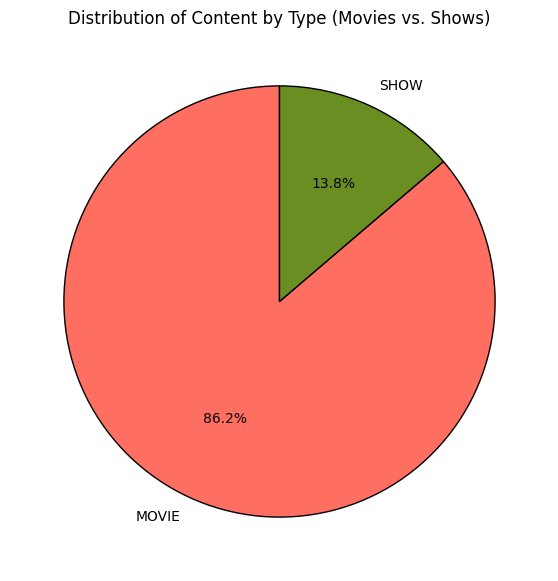

In [261]:
# Chart - 1 no of Movies and shows

# Count the occurrences of each type
type_counts = titles_df["type"].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=["#FF6F61", "#6B8E23"], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Content by Type (Movies vs. Shows)")
plt.show()



##### 1. Why did you pick the specific chart?

This pie chart effectively represents the proportion of content types—movies and shows—on Amazon Prime Video. By visualizing the relative distribution in percentage format, it provides a clear and immediate understanding of which type of content dominates the platform. This comparison is crucial in understanding content strategy and audience preferences.



##### 2. What is/are the insight(s) found from the chart?

- Amazon Prime Video has a significantly higher number of movies (86.2%) compared to shows (13.8%).
- The platform prioritizes movies over TV shows, which may indicate a strategic focus on film licensing or original movie production.
- The smaller share of TV shows suggests limited long-term engagement content compared to competitors who invest more in serialized content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the dominance of movies on the platform can help Amazon optimize content investment. If user engagement and retention data suggest higher watch time for TV shows, increasing show production could drive subscriptions. Conversely, if movies are the primary attraction, Amazon should enhance its movie catalog and licensing deals.

The low proportion of TV shows could limit audience retention, as binge-worthy series often lead to prolonged subscriptions. A more balanced content mix could improve engagement and long-term customer loyalty.

#### Chart - 2

<ipython-input-262-dbdfcccfe4d8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")


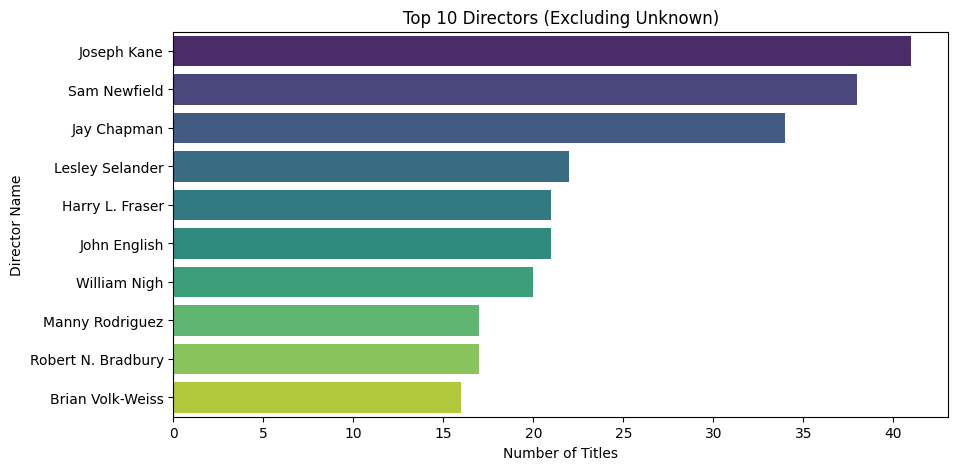

In [262]:
# Chart - 2 Top 10 Directors Barplot

# Explode the lists in 'name' and 'role' columns
credits_df_exploded = credits_df.explode(['name', 'role'])

# Filter for only directors
directors_df = credits_df_exploded[credits_df_exploded['role'] == 'DIRECTOR']

# Count occurrences of each director
top_directors = directors_df['name'].value_counts().drop('Unknown', errors='ignore').head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")
plt.xlabel("Number of Titles")
plt.ylabel("Director Name")
plt.title("Top 10 Directors (Excluding Unknown)")
plt.show()



##### 1. Why did you pick the specific chart?

This horizontal bar chart visualizes the top 10 directors with the most titles on Amazon Prime Video, excluding unknown names. It effectively compares the number of movies or shows directed by each individual, making it easier to identify prolific contributors. This is essential for understanding content production trends and Amazon’s reliance on specific directors.

##### 2. What is/are the insight(s) found from the chart?

- Joseph Kane has directed the highest number of titles, followed by Sam Newfield and Jay Chapman.
- Many of the most featured directors have a background in older or classic films, suggesting a significant portion of Amazon's content comes from historical archives.
- There is limited representation of contemporary high-profile directors, which may indicate a gap in modern exclusive productions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding which directors contribute the most titles allows Amazon to evaluate the quality and reception of their work. If these films perform well, Amazon can continue collaborating with these directors. However, if engagement is lower, shifting investment toward renowned or emerging modern filmmakers could enhance audience appeal and exclusivity.


If a large portion of the most featured directors is associated with older or lower-rated content, it may indicate a lack of fresh, high-quality productions. This could reduce viewer engagement and make Amazon Prime Video less competitive compared to platforms focusing on original and contemporary content.

#### Chart - 3

<ipython-input-263-8eec8f2d96e8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette="magma")


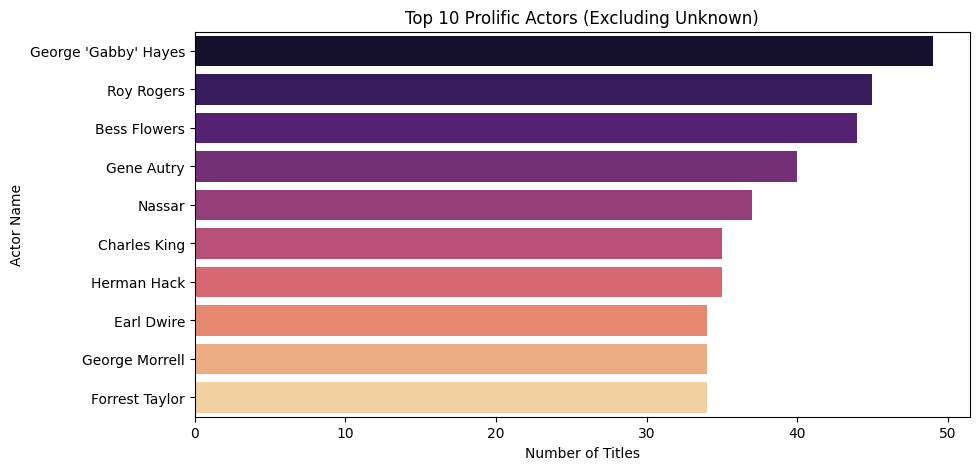

In [263]:
# Chart - 3 Top 10 Actors Barplot

# Explode the lists in 'name' and 'role' columns
credits_df_exploded = credits_df.explode(['name', 'role'])

# Filter for only actors
actors_df = credits_df_exploded[credits_df_exploded['role'] == 'ACTOR']

# Count occurrences of each actor
top_actors = actors_df['name'].value_counts().drop('Unknown', errors='ignore').head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="magma")
plt.xlabel("Number of Titles")
plt.ylabel("Actor Name")
plt.title("Top 10 Prolific Actors (Excluding Unknown)")
plt.show()


##### 1. Why did you pick the specific chart?

This horizontal bar chart displays the top 10 most prolific actors featured on Amazon Prime Video, excluding unknown names. It helps compare the number of titles per actor, highlighting key contributors to the platform’s content library. This is useful in understanding trends in casting and the prevalence of specific actors in available media.

##### 2. What is/are the insight(s) found from the chart?

- George 'Gabby' Hayes has appeared in the most titles, followed closely by Roy Rogers and Bess Flowers.
- Many of the actors listed have a strong association with classic Westerns or older films, suggesting a focus on vintage content.
- There is a noticeable absence of modern, mainstream actors, indicating that Amazon Prime Video may lack recent blockbuster-driven content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By identifying the most featured actors, Amazon can assess their content strategy. If these actors' films perform well, it might justify further investment in similar content. However, if user engagement is low, Amazon may need to diversify its library with more contemporary or star-driven content to attract modern audiences.

A heavy reliance on older actors and classic films may limit Amazon’s appeal to younger audiences who prefer modern films and well-known contemporary stars. This could negatively impact subscriber retention and competitive positioning against platforms with stronger original content offerings.

#### Chart - 4

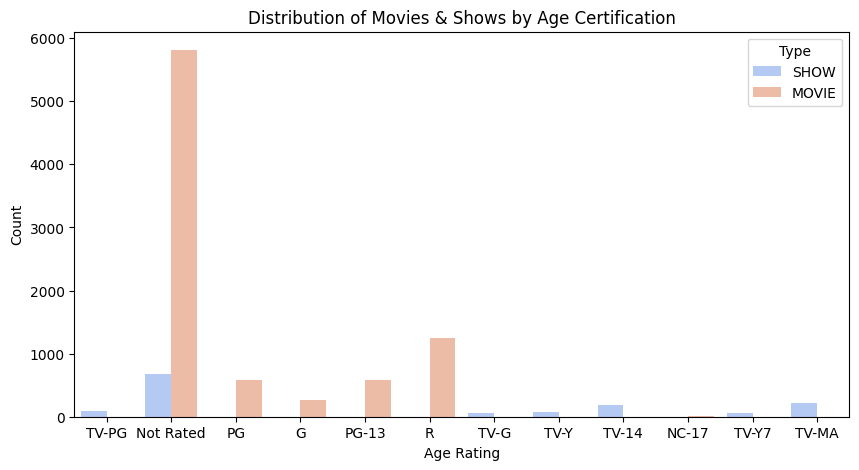

In [264]:
# Chart - 4 Age certification Countplot
plt.figure(figsize=(10, 5))
sns.countplot(x="age_certification", data=titles_df, hue="type", palette="coolwarm")
plt.title("Distribution of Movies & Shows by Age Certification")
plt.xlabel("Age Rating")
plt.ylabel("Count")
plt.legend(title="Type")
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart visualizes the distribution of movies and shows based on age certification, categorizing them by different ratings (e.g., PG, R, TV-MA). It effectively highlights the relative proportions of each category, which is important for understanding content demographics and audience targeting.

##### 2. What is/are the insight(s) found from the chart?

- A significant portion of movies are "Not Rated," which might indicate a lack of classification or older content that was never officially rated.
- R-rated movies have a higher count compared to PG-13 and G, suggesting a preference for more mature content.
- TV content is more evenly distributed across age ratings, but TV-MA and TV-14 have a noticeable presence, implying demand for mature-themed series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help businesses align content with audience preferences. Amazon Prime can optimize their content library by focusing on popular ratings and adjusting marketing strategies to attract specific viewer segments.


The high number of "Not Rated" movies could lead to issues with discoverability and audience trust, as users may hesitate to watch unrated content due to unknown suitability.

#### Chart - 5

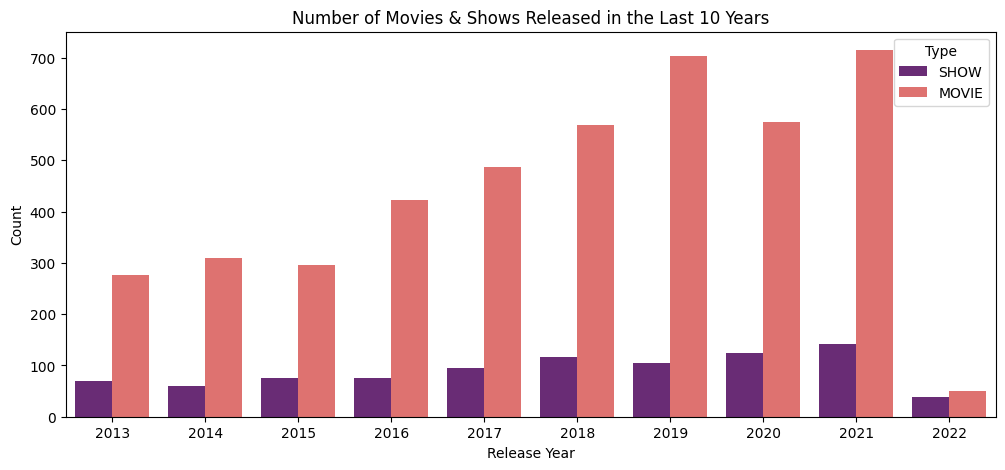

In [265]:
# Chart - 5 No. of titles released in 10 years
recent_years = titles_df[titles_df["release_year"] >= titles_df["release_year"].max() - 9]
plt.figure(figsize=(12, 5))
sns.countplot(x="release_year", data=recent_years, hue="type", palette="magma")
plt.title("Number of Movies & Shows Released in the Last 10 Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(title="Type")
plt.show()


<ipython-input-266-1705a59338f2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_movies["title"], x=top_movies["imdb_score"], ax=axes[i, 0], palette="viridis")
<ipython-input-266-1705a59338f2>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_shows["title"], x=top_shows["imdb_score"], ax=axes[i, 1], palette="magma")
<ipython-input-266-1705a59338f2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_movies["title"], x=top_movies["imdb_score"], ax=axes[i, 0], palette="viridis")
<ipython-input-266-1705a59338f2>:27: FutureWarn

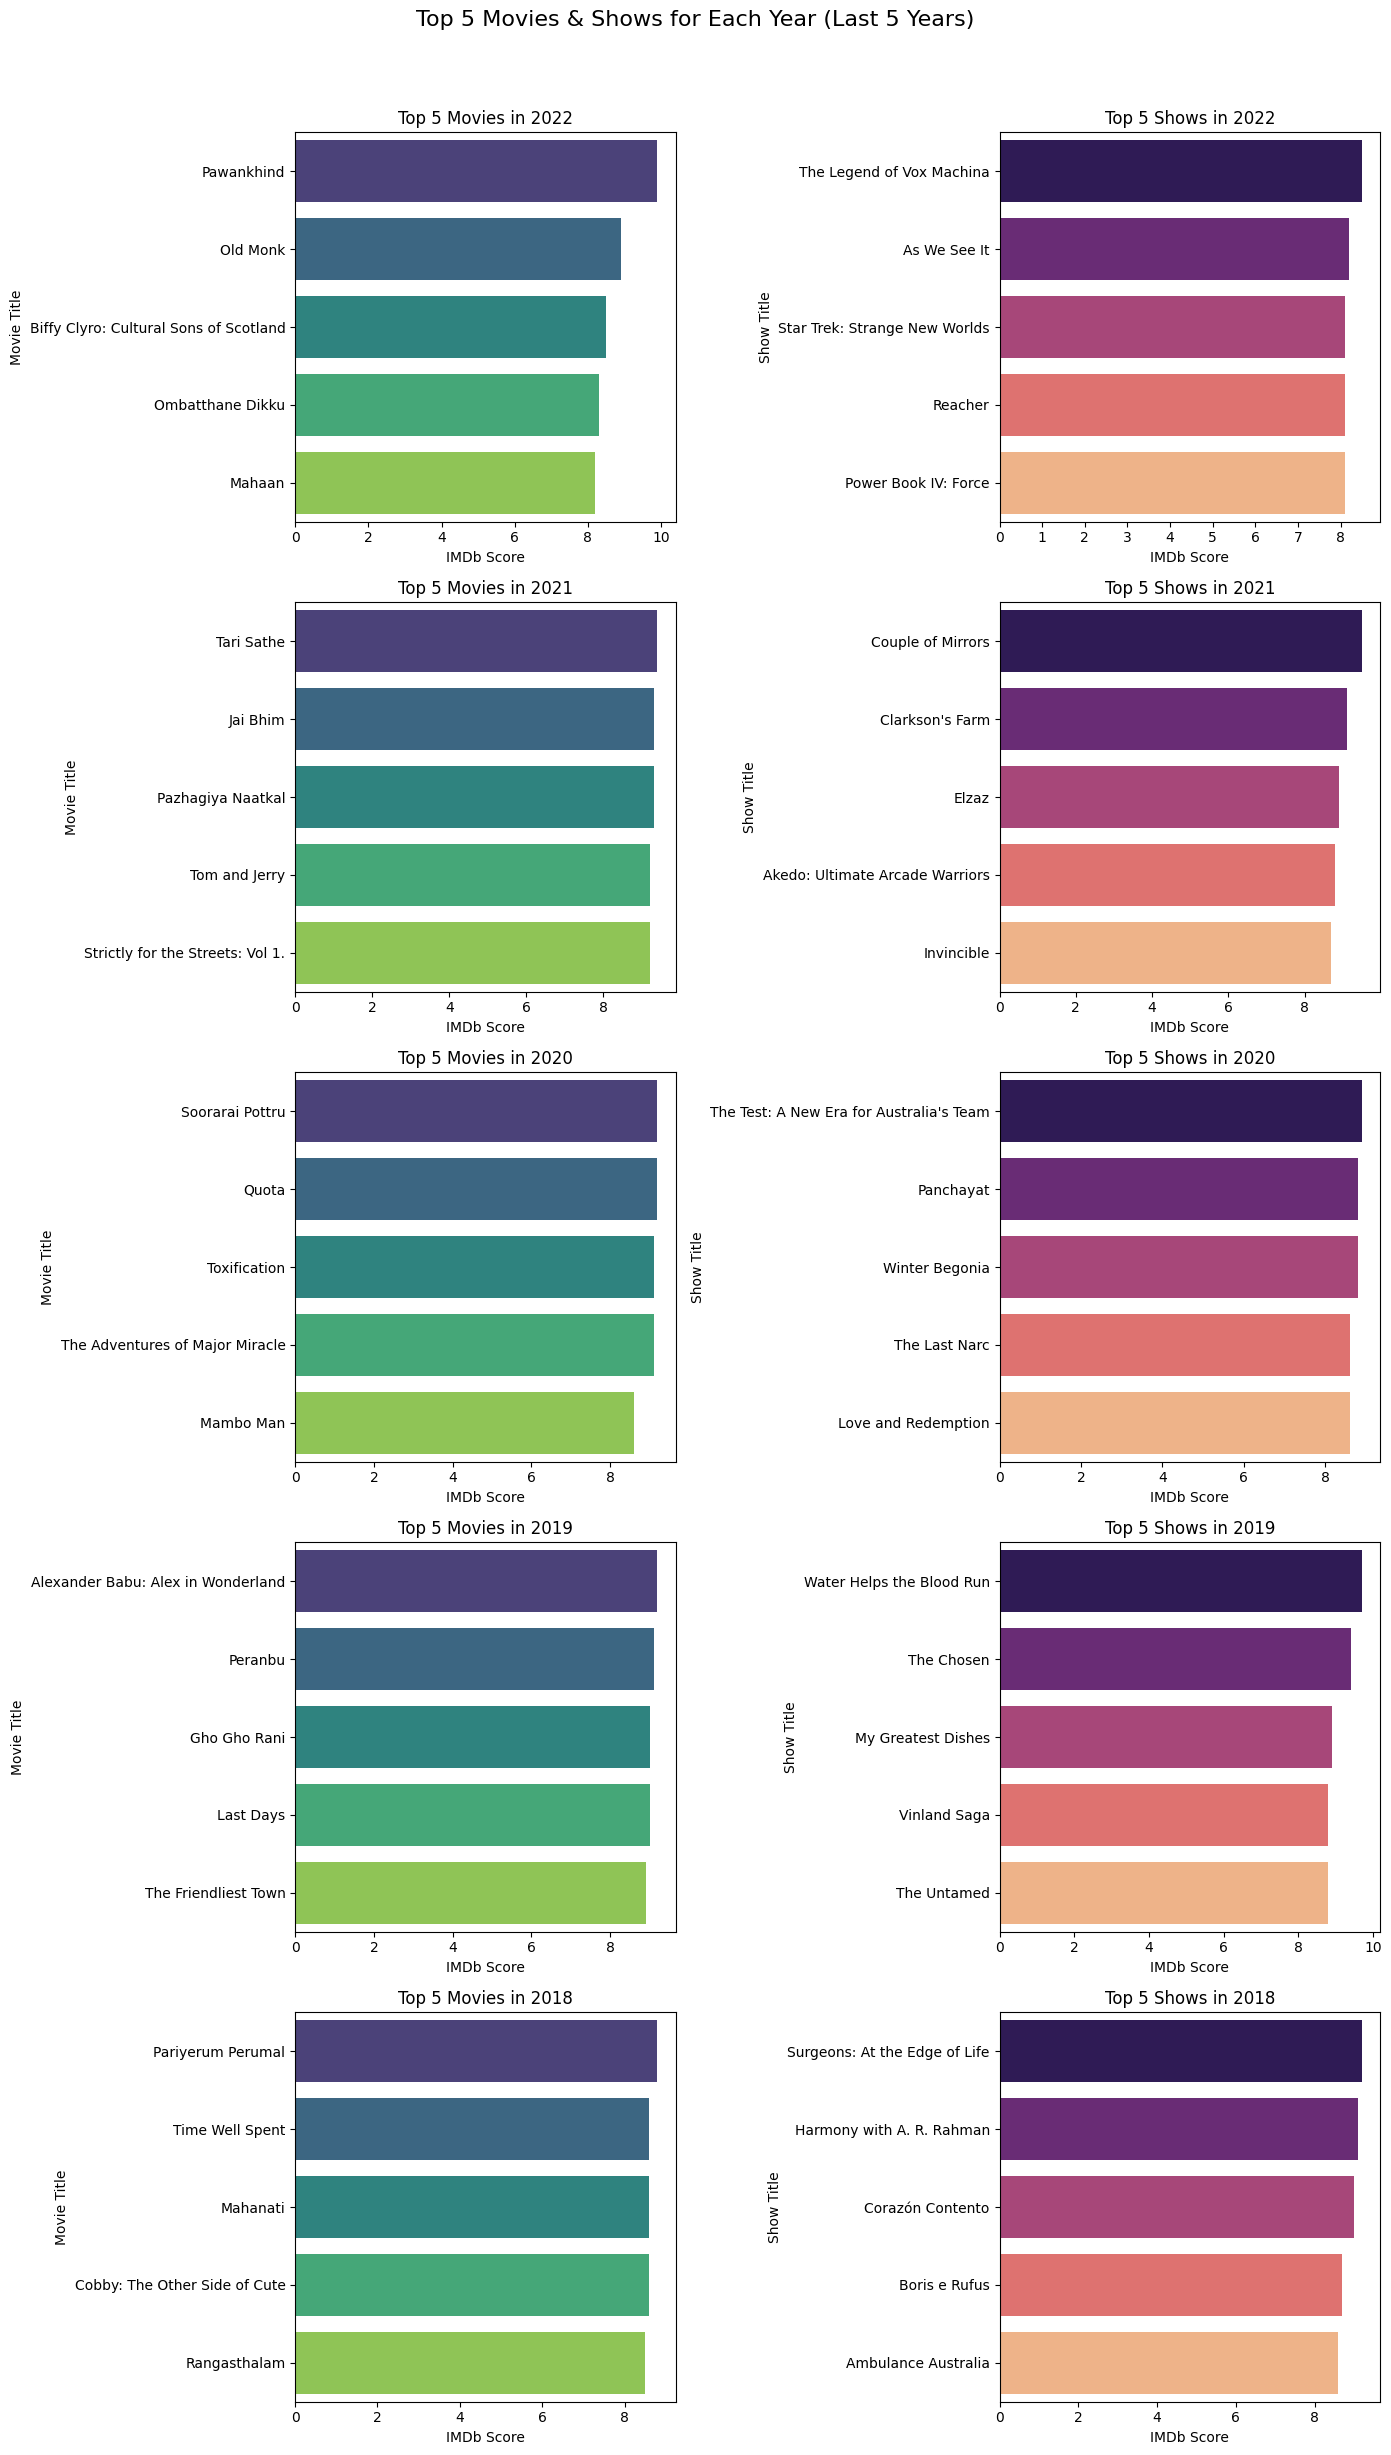

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the last 5 years based on the max release year
max_year = titles_df["release_year"].max()
last_5_years = list(range(max_year, max_year - 5, -1))  # List of last 5 years

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 25))  # 5 years, 2 plots per year
fig.suptitle("Top 5 Movies & Shows for Each Year (Last 5 Years)", fontsize=16)

for i, year in enumerate(last_5_years):
    # Filter data for the specific year
    yearly_data = titles_df[titles_df["release_year"] == year]

    # Get top 5 movies and shows based on IMDb scores
    top_movies = yearly_data[yearly_data["type"] == "MOVIE"].nlargest(5, "imdb_score")[["title", "imdb_score"]]
    top_shows = yearly_data[yearly_data["type"] == "SHOW"].nlargest(5, "imdb_score")[["title", "imdb_score"]]

    # Plot for movies
    sns.barplot(y=top_movies["title"], x=top_movies["imdb_score"], ax=axes[i, 0], palette="viridis")
    axes[i, 0].set_title(f"Top 5 Movies in {year}")
    axes[i, 0].set_xlabel("IMDb Score")
    axes[i, 0].set_ylabel("Movie Title")

    # Plot for shows
    sns.barplot(y=top_shows["title"], x=top_shows["imdb_score"], ax=axes[i, 1], palette="magma")
    axes[i, 1].set_title(f"Top 5 Shows in {year}")
    axes[i, 1].set_xlabel("IMDb Score")
    axes[i, 1].set_ylabel("Show Title")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


##### 1. Why did you pick the specific chart?

This grouped bar chart compares the number of movies and shows released over the last 10 years, with movies and shows represented separately. It effectively highlights trends in content production and helps identify shifts in the industry.

This multi-panel bar chart effectively presents the top 5 movies and TV shows for each year in the last five years, ranked by IMDb score. It provides a clear comparison of audience preferences across different years.

##### 2. What is/are the insight(s) found from the chart?

- There was a consistent increase in movie releases from 2013 to 2019, peaking in 2019, followed by a decline in 2020 and recovery in 2021.
- Show releases remained relatively stable but saw a slight increase in 2020 and 2021.
- A significant drop in both movie and show releases is seen in 2022, which could be due to industry disruptions or data limitations.
- The diversity in movie and show genres suggests evolving trends in audience preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding content release trends helps businesses anticipate market shifts and plan production schedules efficiently. The increase in content production pre-2020 indicates strong demand, and the dip in 2020 could suggest pandemic-related slowdowns, allowing businesses to strategize future releases accordingly.

The sharp decline in 2022 suggests a potential slowdown in production, which could reduce content availability for consumers, affecting engagement and subscription rates.

#### Chart - 6

<ipython-input-267-5e7ff726984e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_genres.values, y=movie_genres.index, palette="magma")


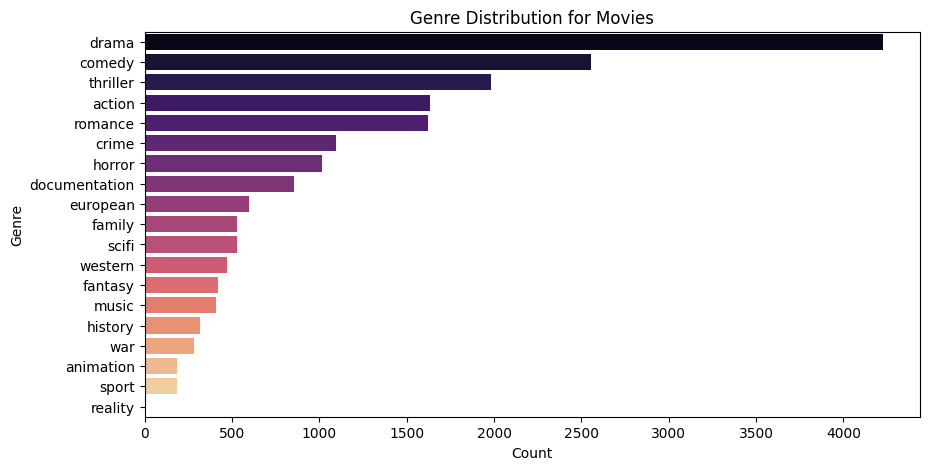

<ipython-input-267-5e7ff726984e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=show_genres.values, y=show_genres.index, palette="coolwarm")


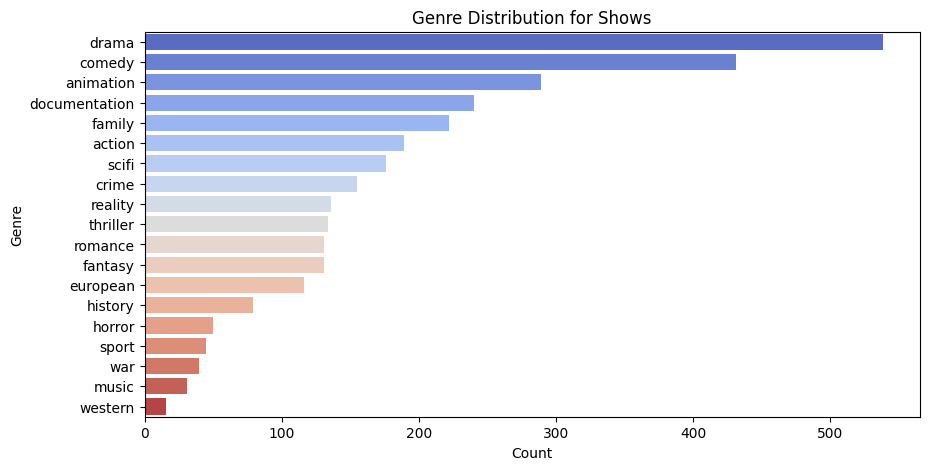

In [267]:
# Chart - 6 Genre distribution
import ast

# Convert 'genres' column from string representation of lists to actual lists
titles_df["genres"] = titles_df["genres"].apply(ast.literal_eval)

# Movies
movie_genres = titles_df[titles_df["type"].str.lower() == "movie"]["genres"].explode().value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=movie_genres.values, y=movie_genres.index, palette="magma")
plt.title("Genre Distribution for Movies")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Shows
show_genres = titles_df[titles_df["type"].str.lower() == "show"]["genres"].explode().value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=show_genres.values, y=show_genres.index, palette="coolwarm")
plt.title("Genre Distribution for Shows")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()




##### 1. Why did you pick the specific chart?

The chosen charts are horizontal bar charts that visualize the genre distribution for movies and shows. The x-axis represents the count of movies/shows, while the y-axis represents different genres. These charts effectively display the relative popularity of each genre, allowing for a quick comparison of trends across entertainment categories. Understanding these distributions is crucial for content creators, streaming services, and studios to align their production with audience preferences.

##### 2. What is/are the insight(s) found from the chart?

- Drama dominates both movies and shows, indicating that it is the most preferred genre across both entertainment formats.
- Comedy ranks highly in both categories, showing that audiences consistently seek lighthearted and humorous content.
- Animation is significantly more popular in shows than in movies, suggesting that animated content is in higher demand in the episodic format, possibly due to its appeal to younger demographics and serialized storytelling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can guide content producers and streaming platforms in allocating resources to genres with high demand. For instance, investing in drama-heavy content is a safe bet, while increasing animated series production could be beneficial. Additionally, platforms can focus on licensing or producing more comedy content to cater to a consistently strong market.

No direct insights indicate negative growth, but a strong focus on dominant genres like drama and comedy might lead to market saturation, making it difficult for new entries to stand out.

#### Chart - 7

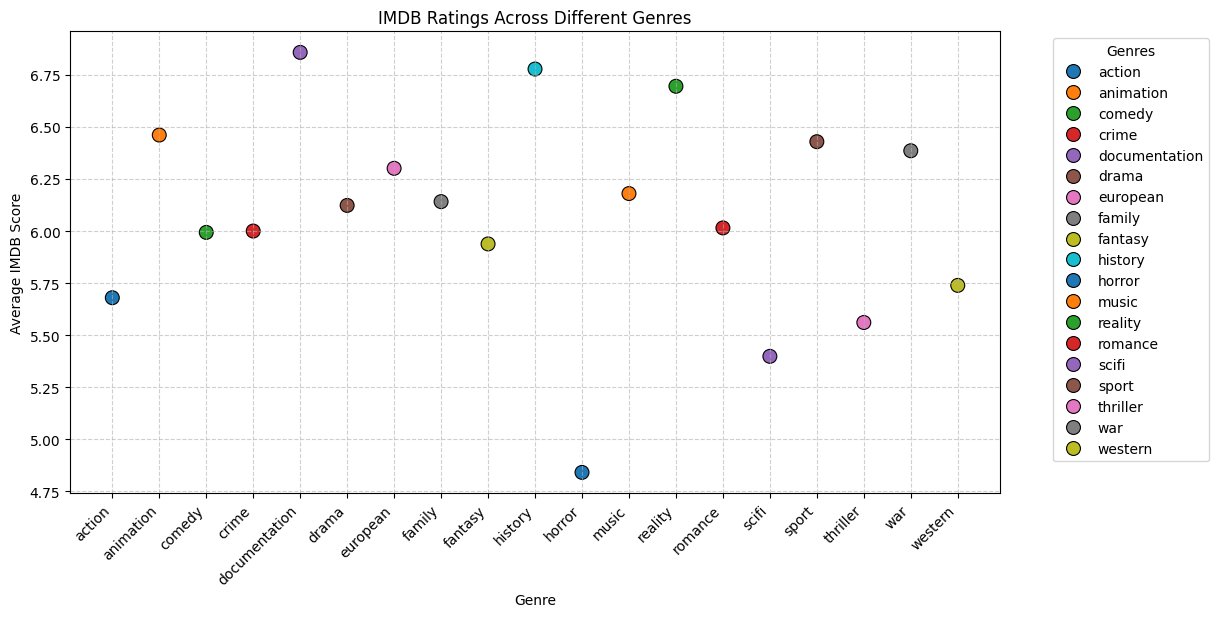

In [268]:
# Chart - 7 Genre imdb rating scatterplot
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'genres' to proper list format
titles_df["genres"] = titles_df["genres"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else x)

# Explode the genres column
titles_df_exploded = titles_df.explode("genres")

# Aggregate IMDB scores by genre
genre_stats = titles_df_exploded.groupby("genres").agg(avg_imdb_score=("imdb_score", "mean")).reset_index()

# Set up color palette (one color per genre)
palette = sns.color_palette("tab10", len(genre_stats))

# Create scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=genre_stats,
    x="genres",
    y="avg_imdb_score",
    hue="genres",  # Different color per genre
    palette=palette,
    s=100,  # Fixed marker size
    edgecolor="black"
)

# Customize plot
plt.xticks(rotation=45, ha="right")
plt.xlabel("Genre")
plt.ylabel("Average IMDB Score")
plt.title("IMDB Ratings Across Different Genres")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


##### 1. Why did you pick the specific chart?

The scatter plot visualizes the average IMDb ratings across different genres, with genres on the x-axis and IMDb scores on the y-axis. This chart is effective in identifying how well different genres are rated by audiences, helping content producers understand which genres tend to receive higher appreciation. This information is critical for decision-making in production and content acquisition.

##### 2. What is/are the insight(s) found from the chart?

- Genres like history, animation, and sci-fi receive the highest IMDb ratings, indicating strong audience appreciation for these categories.
- Horror and sport genres have the lowest average ratings, suggesting they may not consistently meet audience expectations.
- Drama, thriller, and documentary genres maintain steady mid-to-high ratings, reinforcing their reliability in audience engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help businesses prioritize investment in genres that consistently receive high ratings, such as historical dramas or sci-fi content. Additionally, understanding lower-rated genres can guide improvements in storytelling and production quality to enhance audience reception.

Are there any insights that lead to negative growth?
Yes, genres like horror and sport receiving lower ratings could indicate a risk if overinvested in, as they may not drive strong audience engagement unless improved in quality or innovation.

#### Chart - 8

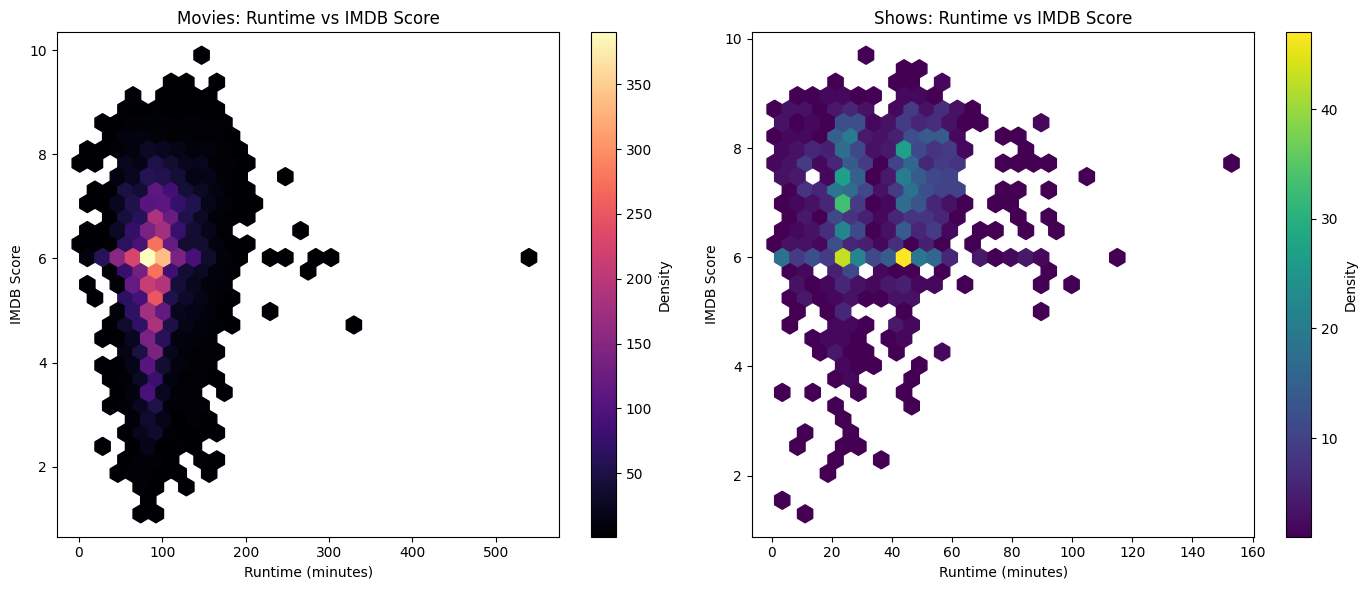

In [269]:
# Chart - 8 runtime and rating hexbin
import seaborn as sns
import matplotlib.pyplot as plt

# Split movies and shows
movies = titles_df[titles_df["type"] == "MOVIE"]
shows = titles_df[titles_df["type"] == "SHOW"]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Hexbin plot for movies
hb1 = ax[0].hexbin(
    movies["runtime"], movies["imdb_score"],
    gridsize=30, cmap="magma", mincnt=1
)
cb1 = fig.colorbar(hb1, ax=ax[0])
cb1.set_label("Density")
ax[0].set_xlabel("Runtime (minutes)")
ax[0].set_ylabel("IMDB Score")
ax[0].set_title("Movies: Runtime vs IMDB Score")

# Hexbin plot for shows
hb2 = ax[1].hexbin(
    shows["runtime"], shows["imdb_score"],
    gridsize=30, cmap="viridis", mincnt=1
)
cb2 = fig.colorbar(hb2, ax=ax[1])
cb2.set_label("Density")
ax[1].set_xlabel("Runtime (minutes)")
ax[1].set_ylabel("IMDB Score")
ax[1].set_title("Shows: Runtime vs IMDB Score")

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

This hexbin plot effectively visualizes the relationship between runtime and IMDb score for both movies and TV shows. It helps to identify trends and density clusters, making it useful for understanding how runtime influences ratings. The hexbin format prevents overplotting and highlights areas of high concentration, making patterns more evident.

##### 2. What is/are the insight(s) found from the chart?

- The highest density cluster is around 90–120 minutes with IMDb scores between 5 and 8, suggesting that most movies fall in this range.
- Very long movies (200+ minutes) tend to have a wider spread in ratings, indicating mixed audience reception.
- The highest density cluster is around 20–60 minutes per episode, with scores generally between 6 and 8.
- Shorter episodes (under 30 minutes) have a more varied spread, suggesting they can either perform exceptionally well or poorly.
- Some high-rated shows exist even with runtimes exceeding 100 minutes per episode, but they are rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can guide content creators and streaming platforms in optimizing runtime decisions for movies and TV shows: If aiming for wider audience appeal, keeping movie runtimes around 90–120 minutes is ideal.
For TV shows, the 20–60 minute range generally performs well, making it the safest choice for episodic content.
Outlier data (longer runtimes with high ratings) can indicate potential success for niche or high-quality productions.

However, Movies exceeding 200 minutes and TV episodes over 100 minutes tend to have a more unpredictable reception, meaning investing in such formats carries higher risk unless backed by strong content.
Short TV episodes (under 20 minutes) have more volatility, suggesting they might struggle to maintain consistent audience engagement.

#### Chart - 9

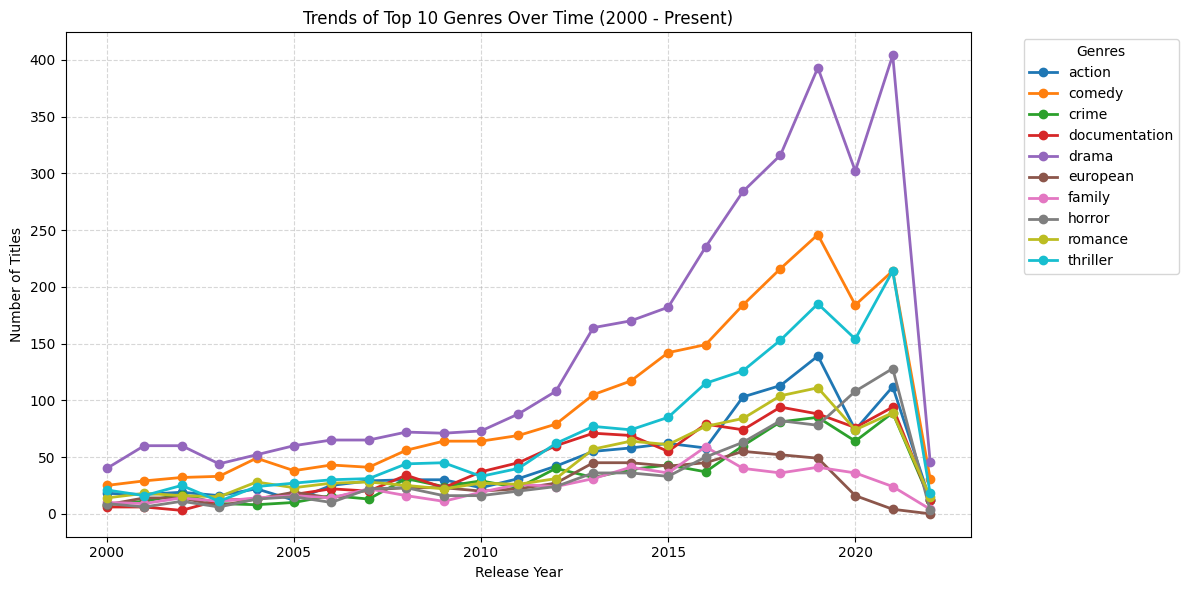

In [270]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for years 2000 and later
filtered_df = titles_df[titles_df["release_year"] >= 2000]

# Explode genres (convert list-like strings into separate rows)
filtered_df = filtered_df.explode("genres")

# Group by year and genre, count occurrences
genre_counts = filtered_df.groupby(["release_year", "genres"]).size().reset_index(name="count")

# Find the top 10 most common genres overall
top_genres = genre_counts.groupby("genres")["count"].sum().nlargest(10).index

# Filter dataset to include only the top genres
genre_counts = genre_counts[genre_counts["genres"].isin(top_genres)]

# Pivot for plotting
genre_pivot = genre_counts.pivot(index="release_year", columns="genres", values="count").fillna(0)

# Plot the trends
plt.figure(figsize=(12, 6))
genre_pivot.plot(kind="line", marker="o", colormap="tab10", linewidth=2, ax=plt.gca())

plt.title("Trends of Top 10 Genres Over Time (2000 - Present)")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The selected charts are line charts that track the number of titles released over time for the top 10 genres from 2000 to the present. These charts visualize how genre popularity has evolved, highlighting industry trends and potential shifts in consumer demand. Tracking these values is crucial for understanding which genres are growing or declining, allowing businesses to make data-driven content investments.

##### 2. What is/are the insight(s) found from the chart?

- Drama and Comedy Lead: Drama has experienced the highest surge in releases, followed by comedy and thriller, indicating strong audience demand.
- Post-2020 Decline Across Genres: A noticeable drop in title production after 2020 suggests industry-wide disruptions, likely due to COVID-19 or changing business models.
- Emerging Popularity of Crime and Horror: Crime and horror genres show steady growth, reflecting an increasing audience preference for darker, suspenseful narratives.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help businesses identify high-performing genres like drama, comedy, and thriller to allocate resources effectively. The growth in crime and horror suggests a rising demand for suspense-driven content, which production houses can leverage for streaming and theatrical releases.

The post-2020 decline presents a potential negative impact, signaling risks of market saturation or economic disruptions affecting content production. To mitigate this, businesses should explore digital-first strategies and global content expansion to sustain growth.

#### Chart - 10

<ipython-input-271-b8b6a7dae978>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_third_tmdb.values, y=top_third_tmdb.index, palette="viridis")


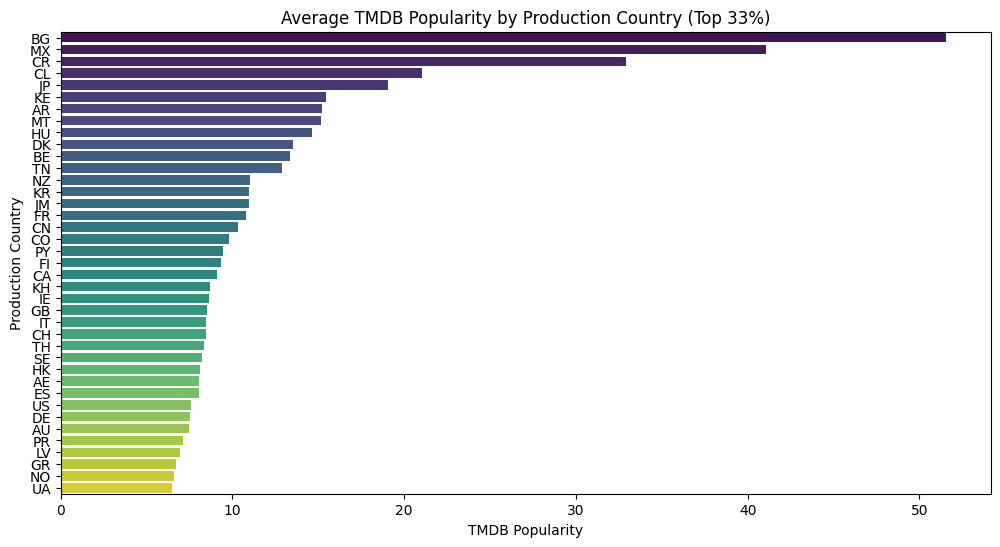

<ipython-input-271-b8b6a7dae978>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_third_imdb.values, y=top_third_imdb.index, palette="coolwarm")


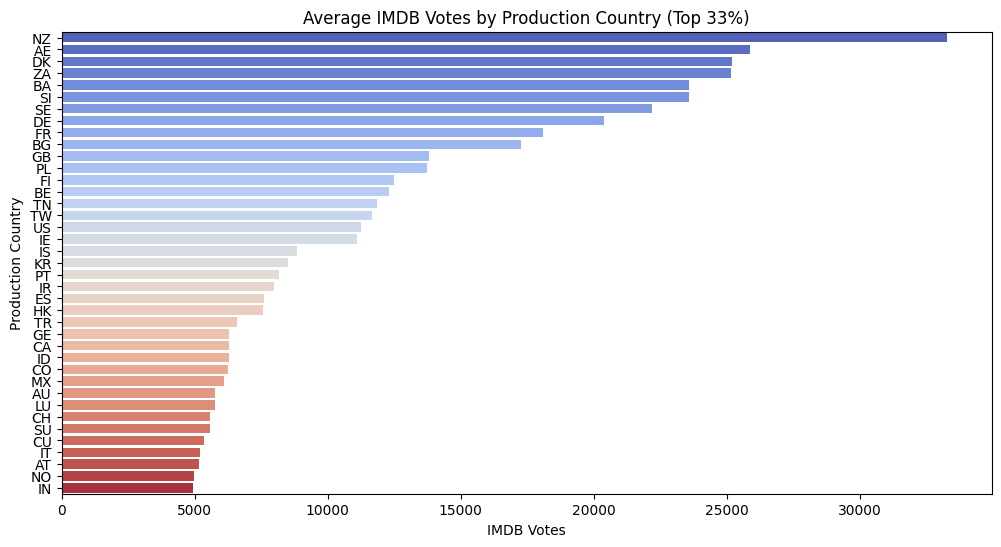

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Function to safely convert string to list
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else val
    except (ValueError, SyntaxError):
        return []

# Apply the function to convert 'production_countries' column
titles_df["production_countries"] = titles_df["production_countries"].apply(safe_literal_eval)


# Explode the dataset to get one row per country
titles_exploded = titles_df.explode("production_countries")

# Aggregate TMDB popularity by country
tmdb_popularity_by_country = titles_exploded.groupby("production_countries")["tmdb_popularity"].mean().sort_values(ascending=False)

# Aggregate IMDB votes by country
imdb_votes_by_country = titles_exploded.groupby("production_countries")["imdb_votes"].mean().sort_values(ascending=False)

# Select only the top 33% of countries for TMDB Popularity
top_third_tmdb = tmdb_popularity_by_country.iloc[:len(tmdb_popularity_by_country) // 3]

# Select only the top 33% of countries for IMDB Votes
top_third_imdb = imdb_votes_by_country.iloc[:len(imdb_votes_by_country) // 3]

# Plot TMDB Popularity (Top 50% Countries)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_third_tmdb.values, y=top_third_tmdb.index, palette="viridis")
plt.title("Average TMDB Popularity by Production Country (Top 33%)")
plt.xlabel("TMDB Popularity")
plt.ylabel("Production Country")
plt.show()

# Plot IMDB Votes (Top 50% Countries)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_third_imdb.values, y=top_third_imdb.index, palette="coolwarm")
plt.title("Average IMDB Votes by Production Country (Top 33%)")
plt.xlabel("IMDB Votes")
plt.ylabel("Production Country")
plt.show()



##### 1. Why did you pick the specific chart?

The chosen charts represent Average TMDB Popularity and Average IMDB Votes by Production Country (Top 33%) using horizontal bar charts. The TMDB chart compares movie popularity across different countries, while the IMDB chart visualizes the number of votes received. These values are crucial as they help analyze how well movies perform across different platforms, reflecting audience engagement and regional cinematic impact.

##### 2. What is/are the insight(s) found from the chart?

- Some countries (e.g., BG, MX, CR) have high TMDB popularity but do not rank equally high in IMDB votes, indicating a difference in user engagement patterns across platforms.
- NZ, AE, and DK lead in IMDB votes but do not dominate in TMDB popularity, suggesting that their movies receive more reviews rather than being widely searched or watched.
- Countries like BG and FR rank well in both charts, showing a balanced presence in both popularity and engagement, which could indicate strong global appeal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can positively impact business by helping streaming platforms and production houses target regions strategically for movie promotions based on engagement trends. For example, movies from BG and MX can focus on maintaining TMDB traction, while NZ and AE could leverage IMDB audience engagement for marketing.

There is no direct negative impact observed, but countries with high TMDB popularity but low IMDB votes might struggle with sustained engagement, which could lead to short-lived success rather than long-term audience retention.

#### Chart - 11

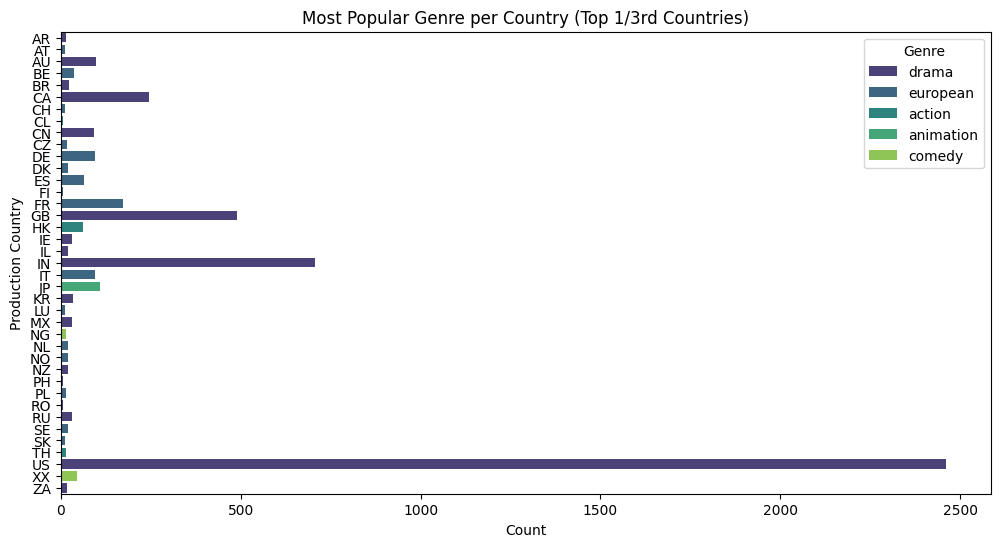

In [272]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Function to safely convert only string-represented lists
def safe_eval(val):
    if isinstance(val, str):  # Only convert if it's a string
        return ast.literal_eval(val)
    return val  # Otherwise, keep it as is

# Apply conversion only if necessary
titles_df["genres"] = titles_df["genres"].apply(safe_eval)
titles_df["production_countries"] = titles_df["production_countries"].apply(safe_eval)

# Explode both columns to get one row per country-genre pair
df_exploded = titles_df.explode("production_countries").explode("genres")

# Count occurrences of each country
country_counts = df_exploded["production_countries"].value_counts()

# Select the top 1/3rd most occurring countries
top_countries = country_counts.head(len(country_counts) // 3).index

# Filter dataset to include only the selected countries
filtered_df = df_exploded[df_exploded["production_countries"].isin(top_countries)]

# Group and count occurrences
country_genre = filtered_df.groupby(["production_countries", "genres"]).size().reset_index(name="count")

# Find the most popular genre per country
top_genre_per_country = country_genre.loc[country_genre.groupby("production_countries")["count"].idxmax()]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genre_per_country, x="count", y="production_countries", hue="genres", dodge=False, palette="viridis")
plt.title("Most Popular Genre per Country (Top 1/3rd Countries)")
plt.xlabel("Count")
plt.ylabel("Production Country")
plt.legend(title="Genre", bbox_to_anchor=(1, 1))
plt.show()


##### 1. Why did you pick the specific chart?

The horizontal bar chart was chosen as it effectively compares the most popular genre per country by displaying production country vs. genre count. This visualization allows for easy comparison across multiple countries, highlighting genre preferences globally. The selected values help understand regional differences in movie production, which is crucial for targeting content strategies.

##### 2. What is/are the insight(s) found from the chart?

- Drama dominates globally, with countries like the US, India, and France producing the highest number of drama movies.
- Regional preferences exist, with European films being popular in France, Spain, and Germany, while action and animation thrive in South Korea.
- The US leads in diversity, producing drama, animation, and comedy, showcasing its broad industry spectrum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help streaming platforms and film production houses localize content strategies by prioritizing genres that perform best in specific countries. This can lead to increased audience engagement and better financial returns.

No, but overgeneralizing genre preferences without considering emerging trends could limit market opportunities for new content types.

#### Chart - 12

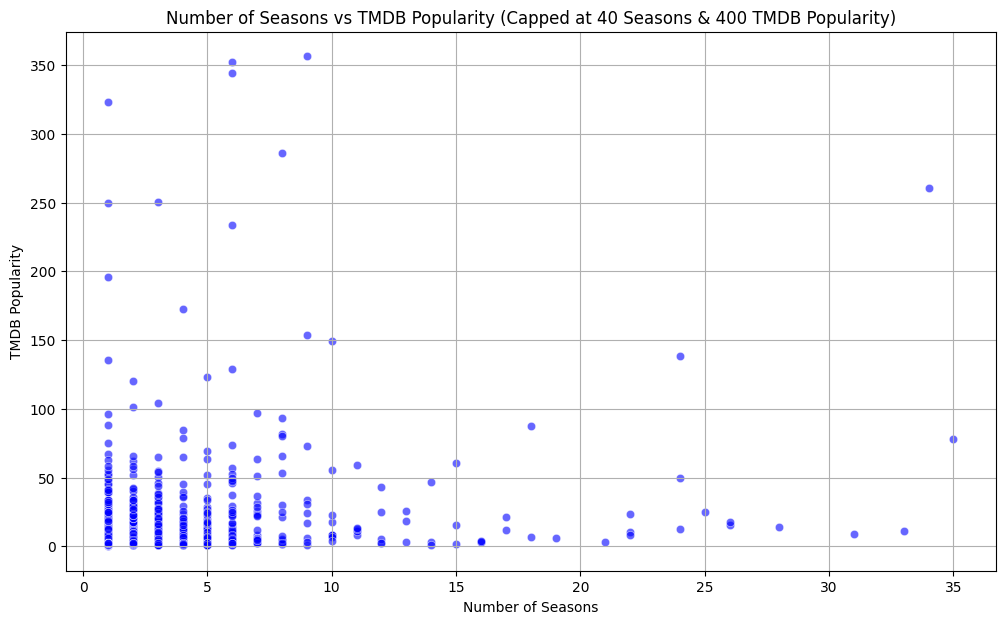

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only TV shows
tv_shows = titles_df[titles_df["type"].str.lower() == "show"]

# Apply scaling limits
filtered_tv_shows = tv_shows[(tv_shows["tmdb_popularity"] <= 400) & (tv_shows["seasons"] <= 40)]

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(data=filtered_tv_shows, x="seasons", y="tmdb_popularity", alpha=0.6, color="blue")

# Titles and Labels
plt.title("Number of Seasons vs TMDB Popularity (Capped at 40 Seasons & 400 TMDB Popularity)")
plt.xlabel("Number of Seasons")
plt.ylabel("TMDB Popularity")
plt.grid(True)

plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot was chosen to analyze the relationship between the number of seasons and TMDB popularity. The x-axis represents the number of seasons, while the y-axis represents TMDB popularity. This visualization is useful in identifying trends and outliers, helping us understand whether long-running shows maintain high popularity or if popularity declines over time.

##### 2. What is/are the insight(s) found from the chart?

- Most popular shows have fewer seasons, with the highest TMDB popularity occurring within the 1-10 season range.
- Longer-running shows tend to have lower popularity, with very few highly popular shows beyond 15 seasons.
- There are outliers, where a few shows with over 20 seasons still maintain decent popularity, though they are rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can guide streaming platforms and production companies in deciding how long to sustain a series. Shows with fewer seasons but high quality seem to attract more viewership, indicating a better return on investment in shorter, well-executed series.

Overextending a series without maintaining quality could result in diminishing popularity, leading to declining viewership and financial losses.

#### Chart - 13

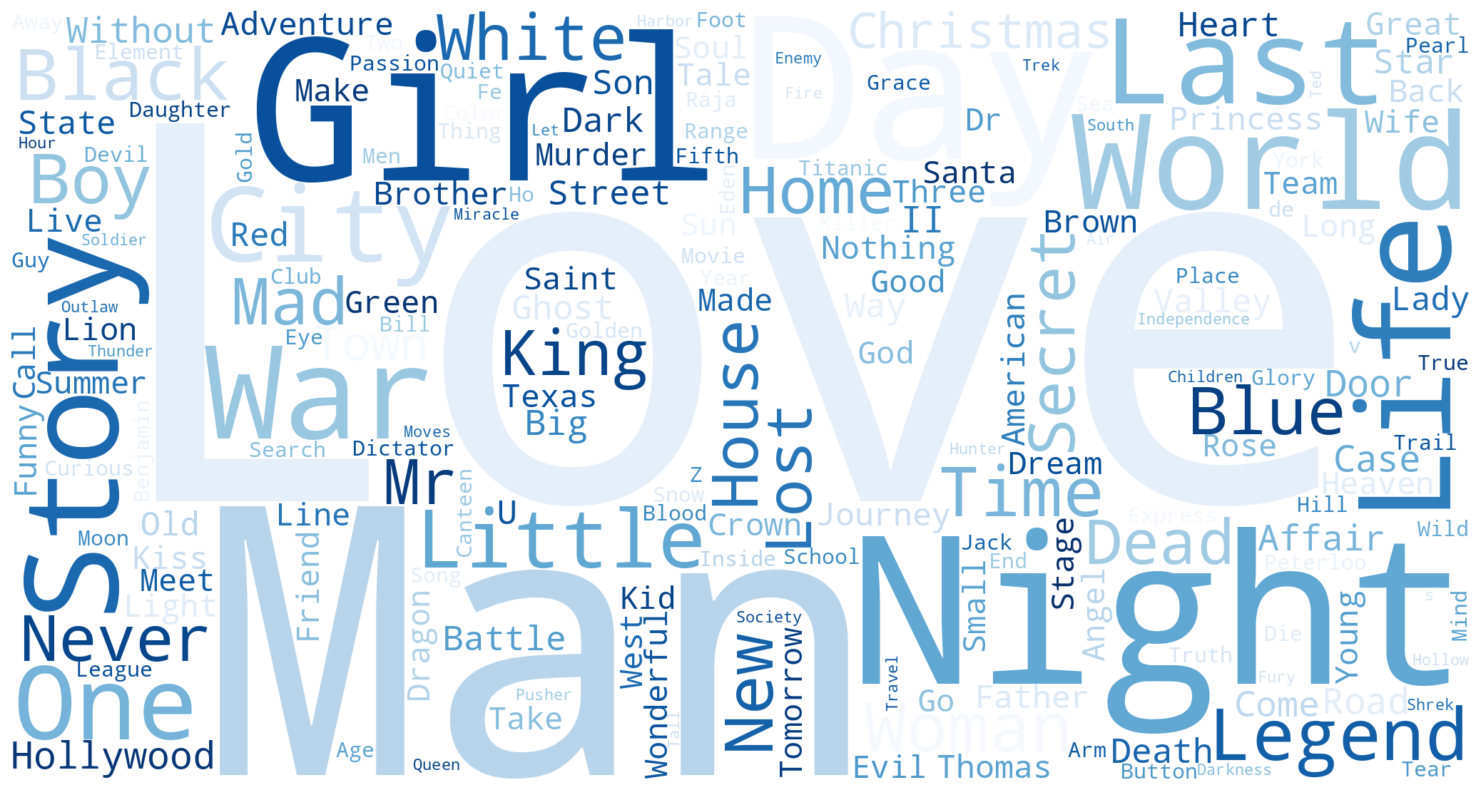

In [274]:
# Chart - 13 visualization code
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter titles of highest IMDb-rated shows/movies (e.g., IMDb score >= 6.5)
high_imdb_titles = merged_df[merged_df["imdb_score"] >= 6]["title"].dropna()

# Join all titles into a single string
txt1 = " ".join(title for title in high_imdb_titles)

# Generate WordCloud
word_cloud1 = WordCloud(
    collocations=False, background_color="white",
    width=2048, height=1080, colormap="Blues_r"
).generate(txt1)

# Plot the WordCloud
plt.figure(figsize=(30, 10))
plt.imshow(word_cloud1, interpolation="bilinear")
plt.axis("off")
plt.show()



<ipython-input-275-6dd41a469203>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data["title_with_year"], x=data["imdb_score"], palette=color_palette)


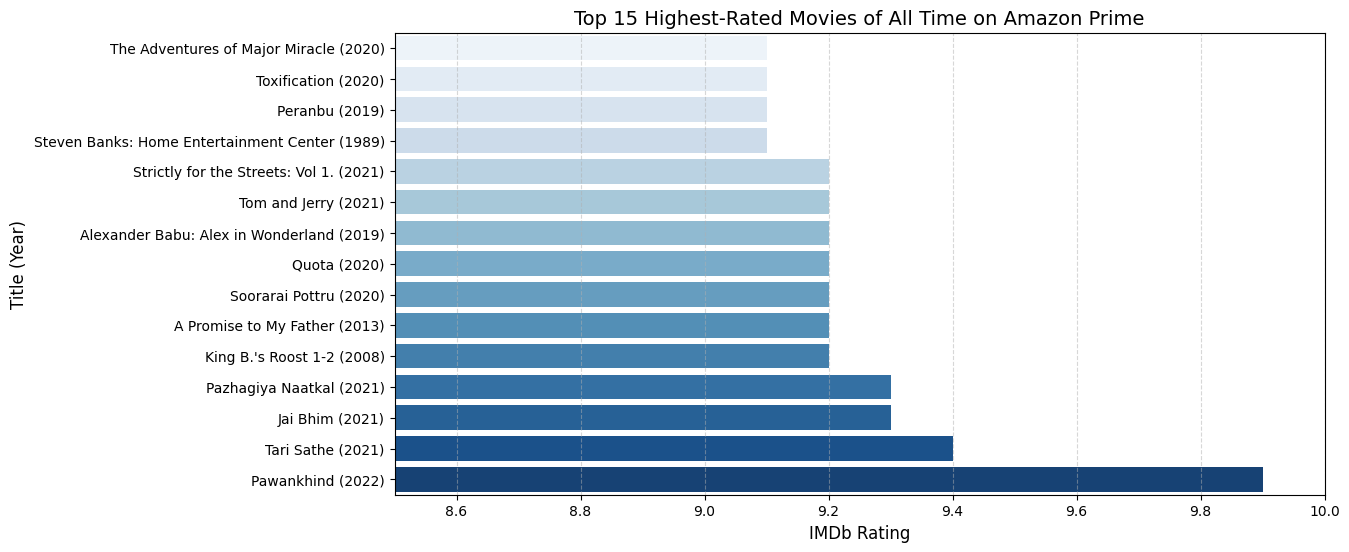

<ipython-input-275-6dd41a469203>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data["title_with_year"], x=data["imdb_score"], palette=color_palette)


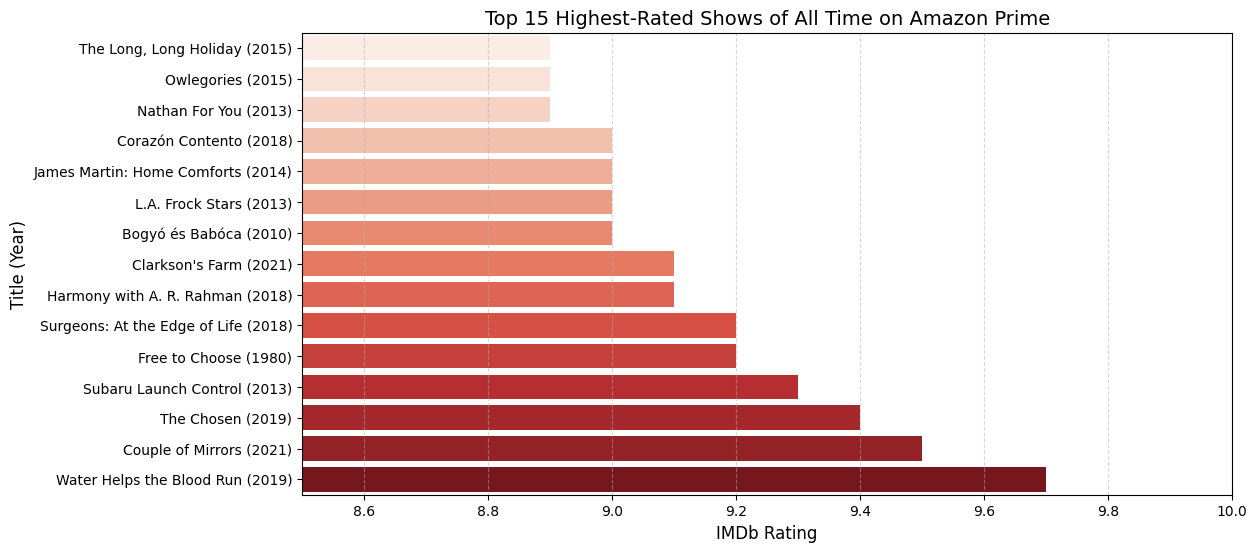

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column combining title and year for better readability
titles_df["title_with_year"] = titles_df["title"] + " (" + titles_df["release_year"].astype(str) + ")"

# Filter top 15 movies and shows based on IMDb rating
top_15_movies = titles_df[titles_df["type"] == "MOVIE"].nlargest(15, "imdb_score")[["title_with_year", "imdb_score"]]
top_15_shows = titles_df[titles_df["type"] == "SHOW"].nlargest(15, "imdb_score")[["title_with_year", "imdb_score"]]

# Function to plot with adjusted x-axis range
def plot_top_titles(data, title, color_palette):
    plt.figure(figsize=(12, 6))
    sns.barplot(y=data["title_with_year"], x=data["imdb_score"], palette=color_palette)
    plt.title(title, fontsize=14)
    plt.xlabel("IMDb Rating", fontsize=12)
    plt.ylabel("Title (Year)", fontsize=12)
    plt.xlim(8.5, 10)  # Set x-axis limits from 8.5 to 10
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.gca().invert_yaxis()  # Highest rated at the top
    plt.grid(axis="x", linestyle="--", alpha=0.5)  # Add grid lines for better readability
    plt.show()

# Plot for Top 15 Movies
plot_top_titles(top_15_movies, "Top 15 Highest-Rated Movies of All Time on Amazon Prime", "Blues_r")

# Plot for Top 15 Shows
plot_top_titles(top_15_shows, "Top 15 Highest-Rated Shows of All Time on Amazon Prime", "Reds_r")


##### 1. Why did you pick the specific chart?

A word cloud was chosen to visualize the most frequently used words in TV show titles. The size of each word represents its frequency, making it easy to identify common themes in naming conventions. This helps understand popular trends and audience preferences in show titles.

Also, I picked these specific bar charts as they effectively display the Top 15 Highest-Rated Movies and Shows on Amazon Prime based on IMDb ratings. The horizontal bar format allows for easy comparison between different titles, with ratings on the x-axis (ranging from 8.6 to 10) and titles with their release years on the y-axis. These values are important as they highlight the highest-rated content on Amazon Prime, helping users choose top-rated movies and shows.

##### 2. What is/are the insight(s) found from the chart?

- Words like "Love," "Story," "Man," "Life," and "Night" appear frequently, suggesting themes of romance, drama, and human experiences are popular.
- Color names like "Blue," "White," and "Black" are commonly used, indicating their strong appeal in show titles.
- Words related to mystery and adventure, such as "Secret," "Lost," "War," and "Legend," are prominent, hinting at audience interest in these genres.
- Pawankhind (2022) is the highest-rated movie, standing out significantly with an IMDb rating close to 9.8, while most other top movies cluster around 9.0-9.4.
- Water Helps the Blood Run (2019) is the highest-rated show, exceeding 9.6, followed closely by Couple of Mirrors (2021) and The Chosen (2019), showing a trend of high-rated content from 2019-2021.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help in strategizing TV show naming conventions to align with audience interests. By using frequently occurring words, networks can create titles that resonate better with viewers, leading to higher engagement and discoverability.

Overusing generic words in titles could make shows blend in rather than stand out, reducing their uniqueness and potential appeal.

#### Chart - 14 - Correlation Heatmap

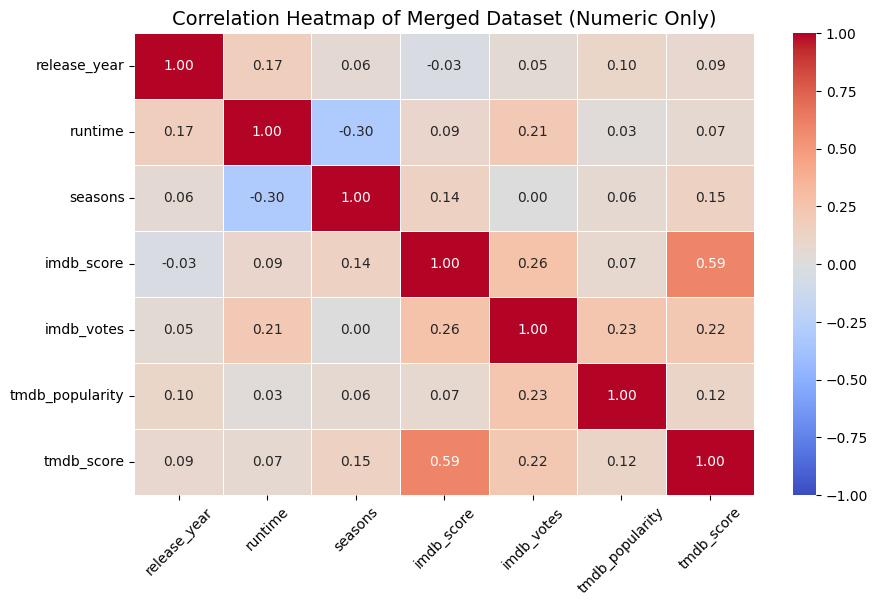

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns based on the provided heatmap
numeric_cols = [
    "release_year", "runtime", "seasons", "imdb_score", "imdb_votes",
    "tmdb_popularity", "tmdb_score"
]
numeric_df = merged_df[numeric_cols]

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Titles and labels
plt.title("Correlation Heatmap of Merged Dataset (Numeric Only)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

I picked this correlation heatmap as it effectively visualizes the relationships between different numeric variables in the merged dataset. The heatmap plots correlations between variables such as IMDb scores, TMDb scores, runtime, release year, seasons, votes, and popularity, where color intensity indicates the strength of correlation. These values are crucial in understanding how different factors influence ratings and popularity on movie and TV platforms.

##### 2. What is/are the insight(s) found from the chart?

- There is a strong positive correlation (0.59) between IMDb scores and TMDb scores, indicating that movies and shows rated highly on IMDb tend to receive high ratings on TMDb as well.
- Runtime and the number of seasons have a negative correlation (-0.30), suggesting that TV series with longer runtimes per episode tend to have fewer seasons.
- IMDb votes correlate positively (0.26) with IMDb scores, meaning that higher-rated movies and shows generally receive more votes from users.

#### Chart - 15 - Pair Plot

<Figure size 1200x1200 with 0 Axes>

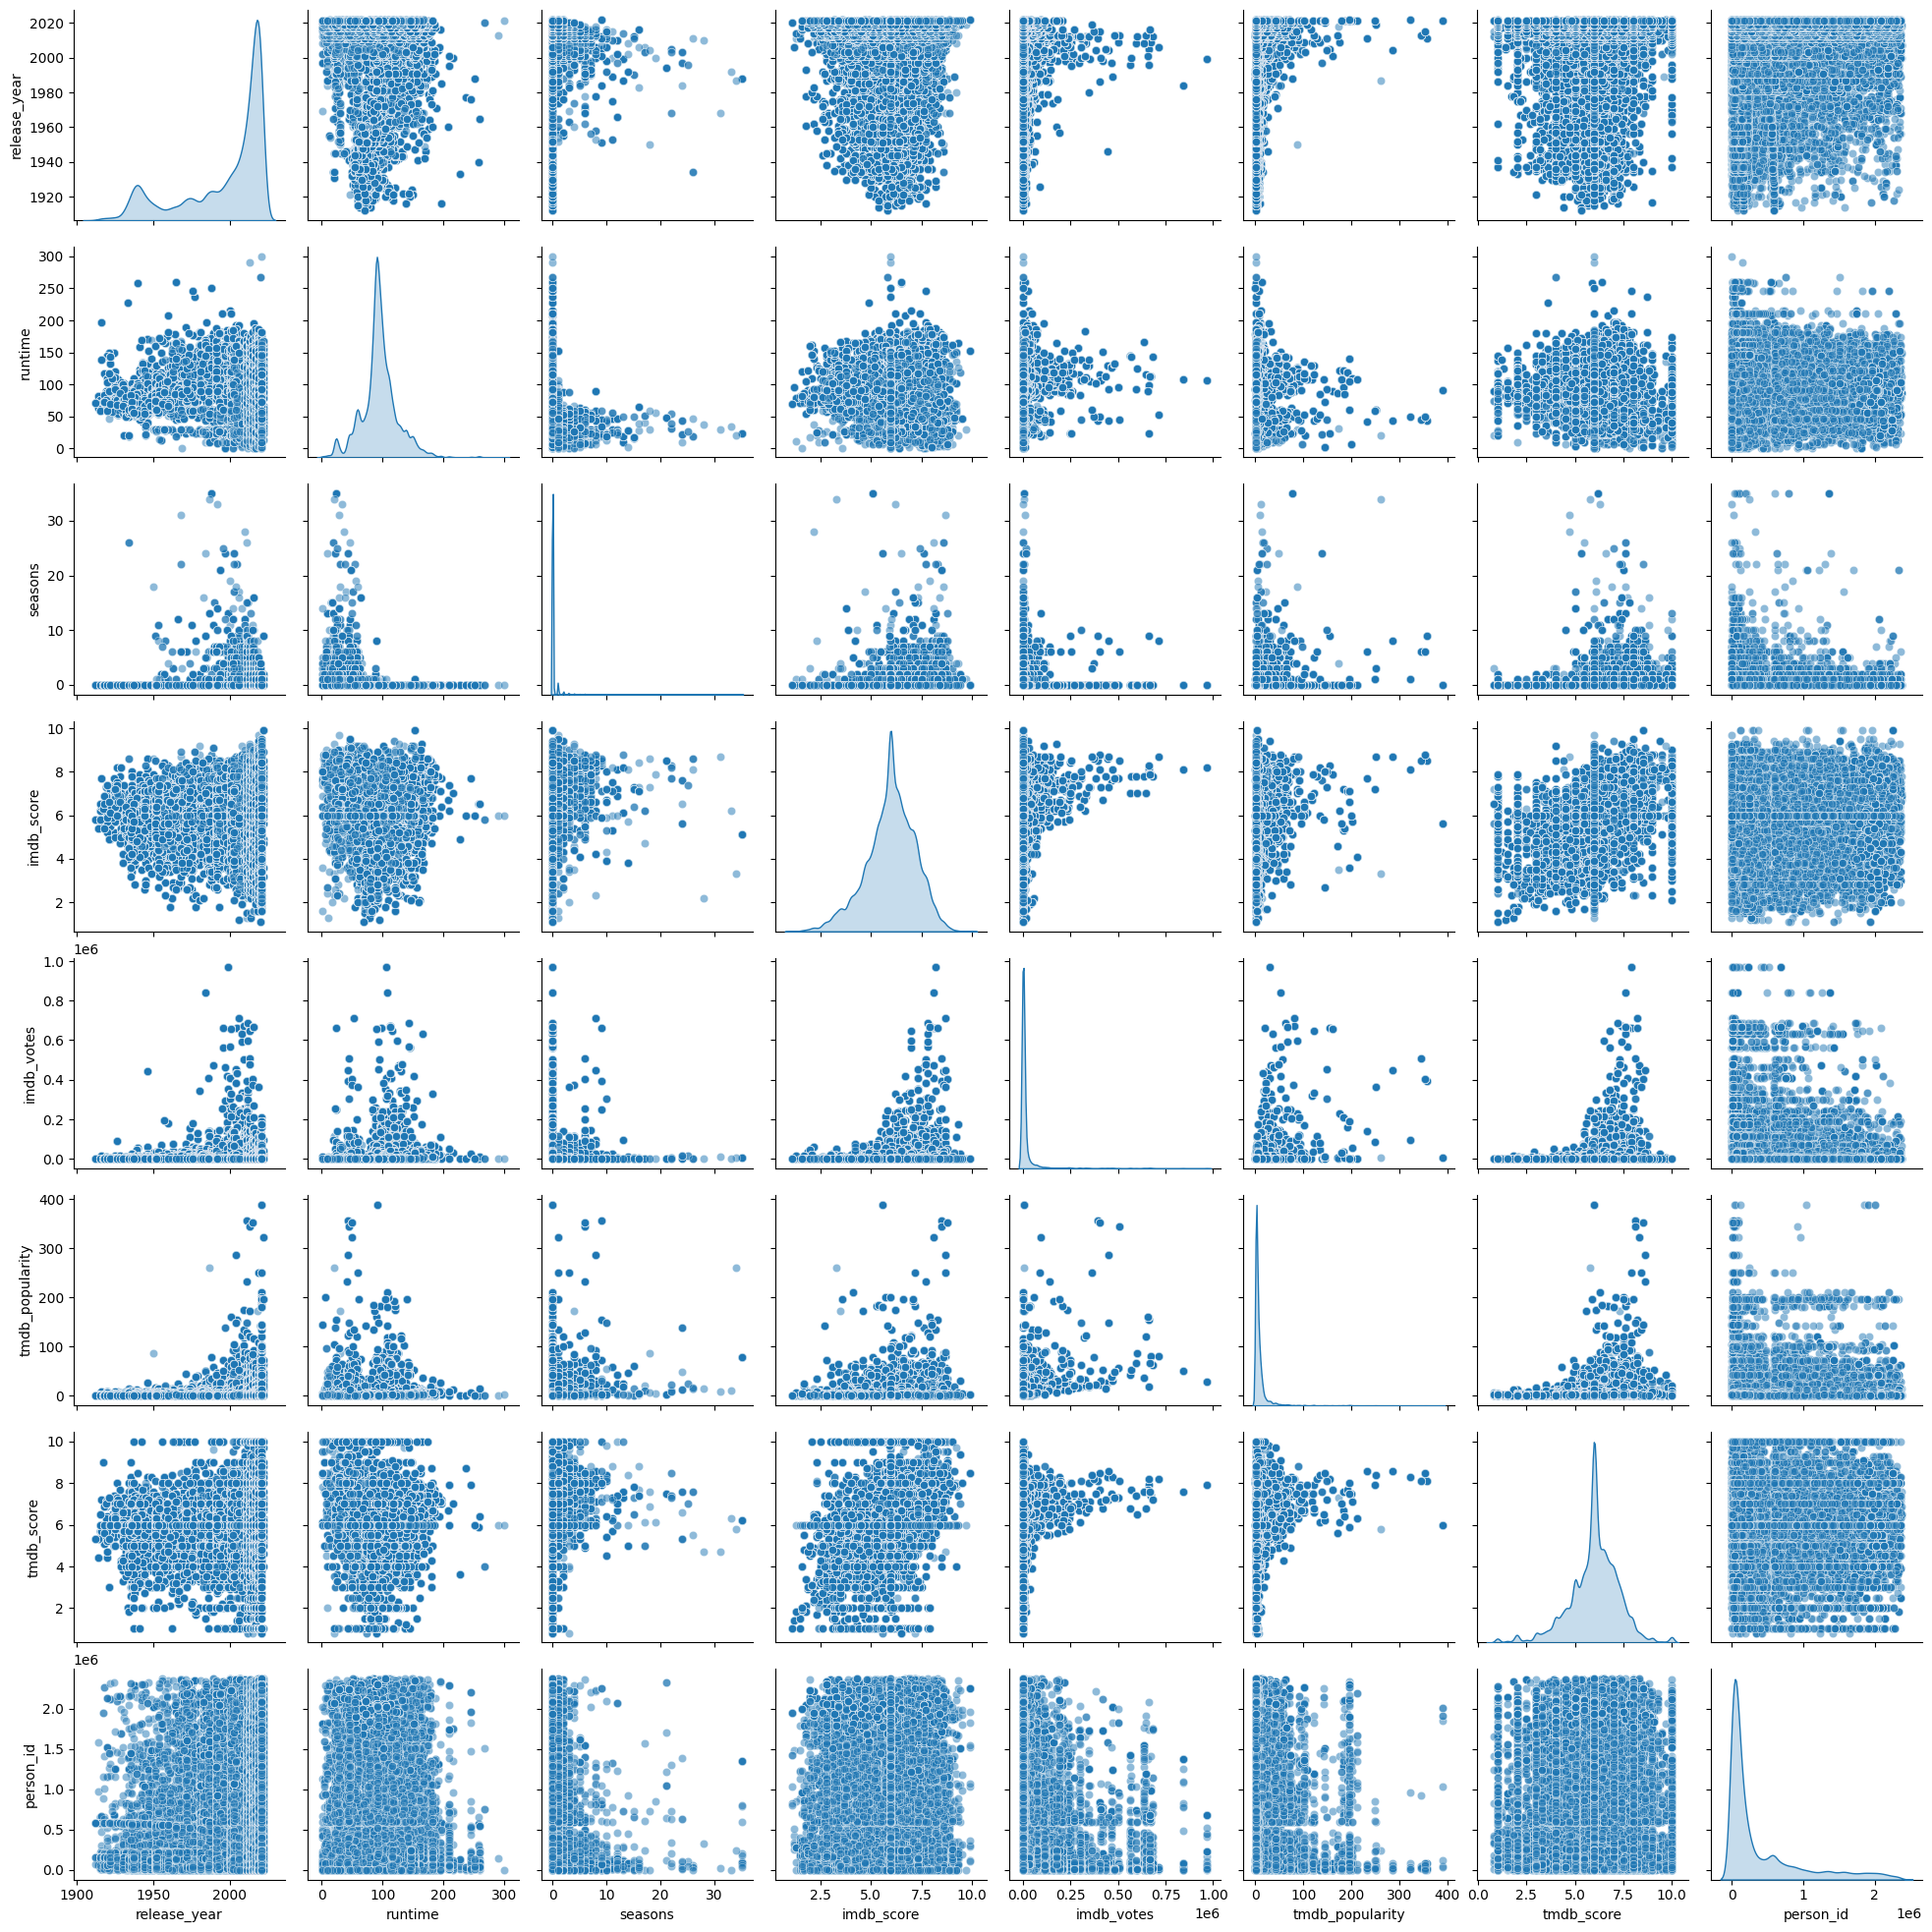

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting all numerical columns except IDs
num_cols = merged_df.select_dtypes(include=['number']).columns.tolist()

# Applying reasonable scaling limits to avoid extreme outliers
filtered_df = merged_df[
    (merged_df["tmdb_popularity"] <= 400) &
    (merged_df["imdb_votes"] <= 1_000_000) &
    (merged_df["seasons"] <= 40) &
    (merged_df["runtime"] <= 300)
]

# Creating pair plot
plt.figure(figsize=(12, 12))
sns.pairplot(filtered_df[num_cols], diag_kind="kde", plot_kws={'alpha': 0.5})

# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

I picked this pair plot (scatter matrix) as it provides a comprehensive view of relationships between multiple numerical variables in the dataset. The chart plots pairwise scatter plots and distributions between variables such as release year, runtime, IMDb score, IMDb votes, TMDb popularity, TMDb score, and person ID. This visualization is useful for identifying correlations, patterns, and potential outliers across different metrics.

##### 2. What is/are the insight(s) found from the chart?

- The IMDb score follows a normal distribution, indicating that most movies/shows have average ratings, with fewer at the extremes.
- IMDb votes and TMDb popularity are right-skewed, meaning only a few movies/shows receive extremely high engagement, while most have lower engagement.
- There is no clear linear relationship between runtime and IMDb scores, suggesting that longer or shorter movies do not necessarily receive higher ratings.

# 5. Solution to Business Objective

### What do you suggest the client to achieve Business Objective ?

### **Improve Amazon Prime Video:**  
* To improve Amazon Prime Video’s services, it is essential to enhance content
diversity by focusing on underrepresented genres and languages to attract a wider audience.

* Optimizing regional availability is another key factor, which can be achieved by using insights from regional content preferences to invest in more localized content.

* Additionally, improving content discovery is crucial, and this can be done by enhancing recommendation algorithms through the incorporation of rating trends, user reviews, and watch patterns. Rather than focusing on increasing the number of available titles, Amazon Prime Video should prioritize quality over quantity by investing in higher-rated content.

* To further improve Amazon Prime Video, insights from EDA visualizations can be used to **identify factors that contribute to high-rated content**. Analyzing **genres, runtimes, number of seasons, and popular actors** can help Amazon prioritize investments in content that historically performs well.

* The platform can also refine its **content curation strategy** by favoring genres with consistently high ratings and **adjusting runtime lengths** based on viewer preferences.

* Additionally, recognizing patterns in **successful multi-season shows** can guide decisions on renewals and cancellations. Leveraging these insights will help **optimize content acquisition, enhance user satisfaction, and boost engagement**.

* Finally, leveraging release trends by analyzing high-engagement periods will help optimize release schedules for maximum viewership, ensuring that content reaches the largest possible audience at the right time.

# **Conclusion**

The data processing and analysis in this notebook provide a comprehensive overview of Amazon Prime Video’s content library, offering valuable insights into content diversity, regional availability, release trends, and ratings. We began with **data wrangling**, where we cleaned the dataset, handled missing values, and checked for duplicate or redundant rows to ensure data integrity. The datasets were then merged into a unified `merged_df` to allow simultaneous analysis of multiple factors. Extensive pre- and post-merging checks ensured that no crucial information was lost. Additionally, we structured credits data into a list format for better usability and verified that missing values were appropriately handled.  

Following the data preparation, we performed **exploratory data analysis (EDA)** through visualizations to uncover key trends. The **release trend analysis** revealed how Amazon’s content library has evolved over the last decade, showing fluctuations in the number of movies and shows added each year. The **top titles released in the last five years** highlighted which movies and shows gained prominence recently.  

The **genre distribution analysis** provided insights into popular content categories, showing which genres dominate the platform and how they cater to audience preferences. Meanwhile, **regional availability analysis** helped us understand content distribution across different countries, demonstrating how Amazon tailors its catalog to regional demand.  

IMDb rating-based visualizations, including **the highest-rated movies and shows**, allowed us to identify critically acclaimed content. By **scaling the ratings from 7 to 10**, we made subtle differences more visible, providing a clearer perspective on content quality. Other **important analyses**, such as runtime distributions, language diversity, and production companies, further refined our understanding of Amazon Prime’s content strategy.  

These insights are crucial for businesses, content creators, and data analysts, helping them make informed decisions about **content acquisition, licensing, and audience engagement strategies**. By leveraging this data, Amazon can enhance user satisfaction, optimize content investments, and drive subscription growth.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***